# 클러스터링 분석

## K-means, GMM, Spectral, HDBSCAN 클러스터링 적용

## XAI 해석 (SHAP, LIME, Permutation Importance 적용)

### 사용할 라이브러리

In [239]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.inspection import permutation_importance
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform
import shap
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [240]:
# macOS에서 한글 폰트 설정
if platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'

# 마이너스(-)가 깨질 수 있는 것을 방지함
plt.rcParams['axes.unicode_minus'] = False


### 데이터 불러오기 (window별 데이터)

In [241]:
# 절대경로로 불러옴
df_2020_2022 = pd.read_csv("../csv/financial_data_window_2020_2022.csv")
df_2021_2023 = pd.read_csv("../csv/financial_data_window_2021_2023.csv")
df_2022_2024 = pd.read_csv("../csv/financial_data_window_2022_2024.csv")

# 기업명을 따로 저장한 후, feature만 따로 분리함
company_2020_2022 = df_2020_2022['기업명_그룹']
company_2021_2023 = df_2021_2023['기업명_그룹']
company_2022_2024 = df_2022_2024['기업명_그룹']
X_raw_2020_2022 = df_2020_2022.drop(columns=["기업명_그룹"])
X_raw_2021_2023 = df_2021_2023.drop(columns=["기업명_그룹"])
X_raw_2022_2024 = df_2022_2024.drop(columns=["기업명_그룹"])

X_raw_2020_2022

,매출액,영업이익,당기순이익,자산총계,자본총계,자본금,영업활동현금흐름,이자발생부채,영업이익률,순이익률,ROE(%),ROA(%),부채비율,EPS(원),PER(배),BPS(원),PBR(배),발행주식수(보통주)
0,70985.166667,2197.000000,1664.000000,2.733767e+04,8672.000000,173.0,5791.166667,7519.166667,3.071667,2.326667,20.556667,6.370000,216.680000,9629.666667,18.258333,50201.166667,3.486667,17283906.0
1,65153.666667,10667.500000,7884.333333,1.302548e+06,104070.666667,16297.0,13934.833333,188141.666667,16.550000,12.281667,8.033333,0.630000,1150.475000,2278.500000,3.096667,29234.333333,0.236667,325935246.0
2,372903.000000,19360.833333,6464.000000,4.477637e+05,169206.666667,1790.0,36457.000000,181936.166667,5.175000,1.726667,4.171667,1.501667,164.290000,5808.000000,17.345000,150724.833333,0.565000,29176998.0
3,116434.333333,3747.500000,1749.333333,9.451867e+04,40292.666667,1141.0,5215.333333,32803.333333,3.213333,1.496667,3.723333,1.875000,134.561667,5678.333333,28.503333,176992.666667,0.658333,22812344.0
4,278437.666667,15670.833333,8298.833333,2.822718e+05,110611.666667,819.0,17094.166667,106516.166667,5.633333,3.008333,10.466667,3.048333,154.990000,37635.166667,10.200000,392853.166667,0.983333,15054186.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,169082.333333,11569.000000,8470.166667,4.893132e+05,72241.666667,447.0,9939.333333,11728.833333,7.235000,5.293333,13.046667,1.703333,665.428333,9474.166667,3.616667,91999.166667,0.303333,89400000.0
187,42520.500000,478.666667,-632.833333,2.837017e+04,5662.000000,2000.0,1157.333333,16159.000000,0.873333,-1.751667,-9.115000,-2.041667,402.983333,-1582.166667,3.356680,14950.833333,5.455000,39248121.0
188,32839.500000,1189.833333,368.333333,4.304900e+04,10586.666667,466.0,677.500000,14398.833333,3.580000,1.130000,2.238333,0.911667,305.755000,2210.333333,34.394582,101515.833333,0.678333,9324548.0
189,81669.500000,5808.000000,3736.166667,4.139467e+04,14648.500000,216.0,4552.666667,14565.000000,7.075000,4.560000,30.030000,10.281667,193.871667,65943.333333,67.425000,274582.666667,1.400000,4327682.0


### featurer scaling 수행

In [242]:
# StandardScaler로 정규화한다.
scaler = StandardScaler()
X_scaled_2020_2022 = scaler.fit_transform(X_raw_2020_2022)
X_scaled_2021_2023 = scaler.fit_transform(X_raw_2021_2023)
X_scaled_2022_2024 = scaler.fit_transform(X_raw_2022_2024)
# X_scaled 데이터를 DataFrame으로 변환
X_scaled_df_2020_2022 = pd.DataFrame(X_scaled_2020_2022, columns=X_raw_2020_2022.columns)
X_scaled_df_2021_2023 = pd.DataFrame(X_scaled_2021_2023, columns=X_raw_2021_2023.columns)
X_scaled_df_2022_2024 = pd.DataFrame(X_scaled_2022_2024, columns=X_raw_2022_2024.columns)

# CSV 파일로 저장
# X_scaled_df_2020_2022.to_csv("../csv/X_scaled_2020_2022.csv", index=False, encoding="utf-8-sig")
# X_scaled_df_2021_2023.to_csv("../csv/X_scaled_2021_2023.csv", index=False, encoding="utf-8-sig")
# X_scaled_df_2022_2024.to_csv("../csv/X_scaled_2022_2024.csv", index=False, encoding="utf-8-sig")

# print("X_scaled 데이터가 'X_scaled.csv'로 저장되었습니다.")

### 클러스터링 적용 및 평가 함수 정의

In [243]:
# 클러스터링 성능 평가 함수를 정의함 
# Silhouette Score를 사용함
def evaluate_clustering(model, X, labels=None):
    if (labels is None):
        labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    return labels, score

### ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

### 최적의 K 찾기 (2020-2022) - 그래프

In [244]:
# # 상수항 추가 (VIF 계산 시 필요)
# X_with_const = sm.add_constant(X_scaled_df_2020_2022)

# # VIF 계산
# vif_data = pd.DataFrame()
# vif_data["Feature"] = X_with_const.columns
# vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) 
#                    for i in range(X_with_const.shape[1])]

# # 결과 확인
# vif_data.sort_values("VIF", ascending=False)

In [245]:
# # 'const' 제외하고 VIF ≤ 10 인 피처만 선택
# vif_threshold = 10
# valid_features = vif_data[(vif_data["Feature"] != "const") & (vif_data["VIF"] <= vif_threshold)]["Feature"]

# # 해당 피처들만 남긴 새로운 DataFrame 생성
# X_scaled_df_2020_2022 = X_scaled_df_2020_2022[valid_features]


Best K for KMeans (lowest DBI): 26 -> DBI = 0.6598
Best K for GMM (lowest DBI): 26 -> DBI = 0.6849
Best K for Spectral Clustering (lowest DBI): 29 -> DBI = 1.3716


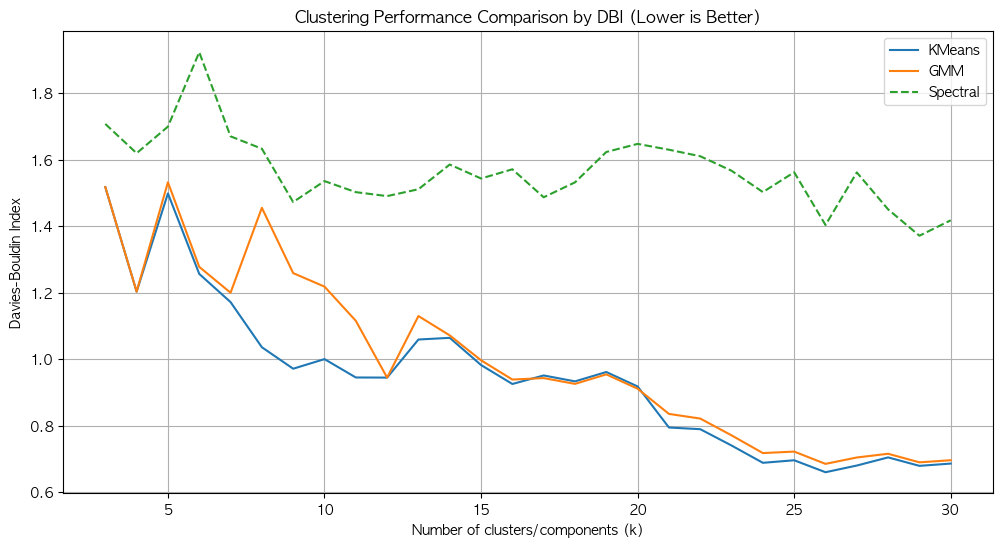

In [246]:
# 결과 저장
k_range = range(3, 31)

dbi_kmeans, dbi_gmm, dbi_spectral = [], [], []

labels_kmeans_all, labels_gmm_all, labels_spectral_all = {}, {}, {}

# 반복 수행
for k in k_range:
    # KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_labels_2020_2022 = kmeans.fit_predict(X_scaled_2020_2022)
    dbi_kmeans.append(davies_bouldin_score(X_scaled_df_2020_2022, kmeans_labels_2020_2022))
    labels_kmeans_all[k] = kmeans_labels_2020_2022

    # GMM
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels_2020_2022 = gmm.fit_predict(X_scaled_df_2020_2022)
    dbi_gmm.append(davies_bouldin_score(X_scaled_df_2020_2022, gmm_labels_2020_2022))
    labels_gmm_all[k] = gmm_labels_2020_2022

    # Spectral Clustering
    try:
        spectral = SpectralClustering(n_clusters=k, random_state=42, affinity='nearest_neighbors', assign_labels='kmeans')
        spectral_labels_2020_2022 = spectral.fit_predict(X_scaled_df_2020_2022)
        dbi_spectral.append(davies_bouldin_score(X_scaled_df_2020_2022, spectral_labels_2020_2022))
        labels_spectral_all[k] = spectral_labels_2020_2022

    except Exception:
        # 실패한 경우 큰 값으로 대체 (e.g., affinity 문제 등)
        dbi_spectral.append(np.inf)
        labels_spectral_all[k] = None


# 가장 낮은 DBI를 보이는 k 찾기
best_k_kmeans = k_range[np.argmin(dbi_kmeans)]
best_k_gmm = k_range[np.argmin(dbi_gmm)]
best_k_spectral = k_range[np.argmin(dbi_spectral)]

min_dbi_kmeans = min(dbi_kmeans)
min_dbi_gmm = min(dbi_gmm)
min_dbi_spectral = min(dbi_spectral)

# 3. 세 값 비교해서 최소값 및 방법 선택
dbi_dict = {
    'KMeans': (best_k_kmeans, min_dbi_kmeans),
    'GMM': (best_k_gmm, min_dbi_gmm),
    'Spectral': (best_k_spectral, min_dbi_spectral)
}

# 결과 출력
print(f"Best K for KMeans (lowest DBI): {best_k_kmeans} -> DBI = {min_dbi_kmeans:.4f}")
print(f"Best K for GMM (lowest DBI): {best_k_gmm} -> DBI = {min_dbi_gmm:.4f}")
print(f"Best K for Spectral Clustering (lowest DBI): {best_k_spectral} -> DBI = {min_dbi_spectral:.4f}")

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(k_range, dbi_kmeans, label='KMeans')
plt.plot(k_range, dbi_gmm, label='GMM')
plt.plot(k_range, dbi_spectral, label='Spectral', linestyle='--')
plt.xlabel('Number of clusters/components (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Clustering Performance Comparison by DBI (Lower is Better)')
plt.legend()
plt.grid(True)
plt.show()


### K-means, GMM, Sperctral Clustering 적용 및 비교

In [247]:
# # Window 2020-2022

# # K-means clustering
# # K-means는 k=26에서 가장 높은 점수를 보임
# kmeans = KMeans(n_clusters=26, random_state=42)
# kmeans_labels_2020_2022, kmeans_score_2020_2022 = evaluate_clustering(kmeans, X_scaled_df_2020_2022)

# # GMM
# # GMM은 k=29에서 가장 높은 점수를 보임
# gmm = GaussianMixture(n_components=26, random_state=42)
# gmm_labels_2020_2022, gmm_score_2020_2022 = evaluate_clustering(gmm, X_scaled_df_2020_2022, labels=gmm.fit_predict(X_scaled_df_2020_2022))

# # Spectral clustering
# # Spectral clustering은 거의 모든 k의 범위에서 평가가 낮게 나옴
# spectral = SpectralClustering(n_clusters=29, random_state=42, affinity='nearest_neighbors')
# spectral_labels_2020_2022, spectral_score_2020_2022 = evaluate_clustering(spectral, X_scaled_df_2020_2022)


# # Davies-Bouldin Index 계산
# # 보통 0.5 ~ 1.0 사이면 괜찮은 클러스터링이라고 함. 실무에서 자주 나오는 수준
# kmeans_dbi_2020_2022 = davies_bouldin_score(X_scaled_df_2020_2022, kmeans_labels_2020_2022)
# gmm_dbi_2020_2022 = davies_bouldin_score(X_scaled_df_2020_2022, gmm_labels_2020_2022)
# spectral_dbi_2020_2022 = davies_bouldin_score(X_scaled_df_2020_2022, spectral_labels_2020_2022)

# # 결과 비교 출력
# print(f"KMeans Davies-Bouldin Index: {kmeans_dbi_2020_2022:.4f}")
# print(f"GMM Davies-Bouldin Index: {gmm_dbi_2020_2022:.4f}")
# print(f"Spectral Davies-Bouldin Index: {spectral_dbi_2020_2022:.4f}")

# # # 결과 비교
# # print(f"KMeans Silhouette Score: {kmeans_score:.4f}")
# # print(f"GMM Silhouette Score: {gmm_score:.4f}")
# # print(f"Spectral Silhouette Score: {spectral_score:.4f}")


### 최종적으로 선택한 클러스터 결과 저장 (K-means)

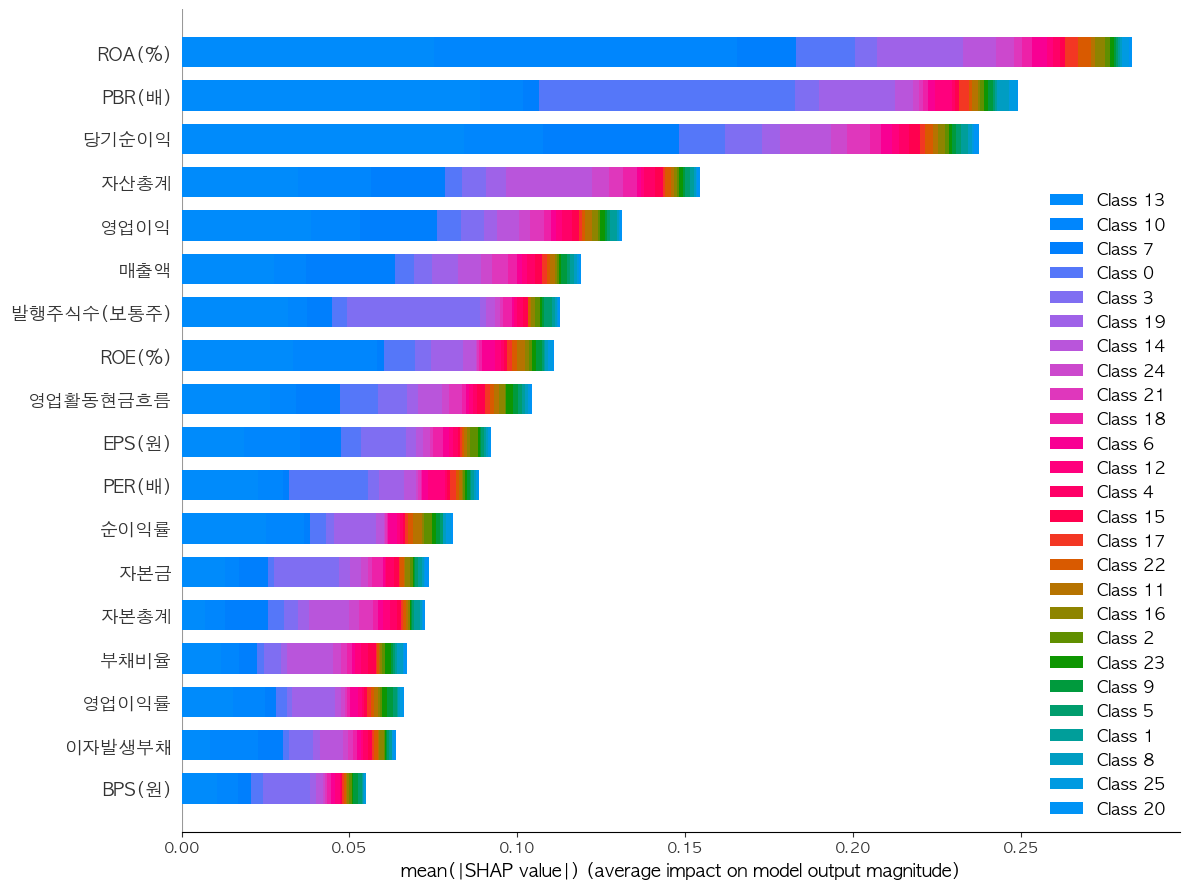

실제 사용된 클러스터 수: 26


In [248]:
best_method = min(dbi_dict, key=lambda k: dbi_dict[k][1])
best_k_method = dbi_dict[best_method][0]
best_dbi_value = dbi_dict[best_method][1]


if best_method == 'KMeans':
    final_labels_2020_2022 = labels_kmeans_all[best_k_method]
elif best_method == 'GMM':
    final_labels_2020_2022 = labels_gmm_all[best_k_method]
elif best_method == 'Spectral':
    final_labels_2020_2022 = labels_spectral_all[best_k_method]


# 데이터에 라벨 부착
df_2020_2022['Cluster'] = final_labels_2020_2022

# ✅ RandomForest 학습
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_scaled_df_2020_2022, final_labels_2020_2022)

# ✅ SHAP 분석
explainer = shap.TreeExplainer(clf)
shap_values_2020_2022 = explainer.shap_values(X_scaled_df_2020_2022)

# ✅ summary plot
shap.summary_plot(shap_values_2020_2022, X_scaled_df_2020_2022, plot_type="bar", show=False)
plt.gcf().set_size_inches(12, 9)
plt.tight_layout()
plt.show()

# ✅ 확인: 실제 클러스터 수
print("실제 사용된 클러스터 수:", len(np.unique(final_labels_2020_2022)))


In [249]:
# 클러스터별 SHAP 값의 평균 구하기
cluster_shap_means_2020_2022 = {}
unique_clusters_2020_2022 = np.unique(final_labels_2020_2022)

for cluster_id in unique_clusters_2020_2022:
    # 현재 클러스터에 속한 인덱스 추출
    cluster_indices = np.where(final_labels_2020_2022 == cluster_id)[0]
    
    # 해당 클러스터에 대한 SHAP 값만 선택
    cluster_shap_values = shap_values_2020_2022[cluster_indices]
    
    # SHAP 값의 절대값 평균 계산
    cluster_mean_shap = np.abs(cluster_shap_values).mean(axis=0)
    
    # 2차원 배열인 경우 1차원으로 변환 (첫 번째 차원만 사용하거나 적절히 처리)
    if len(cluster_mean_shap.shape) > 1:
        # 차원이 (14, 4)와 같이 2차원인 경우, 첫 번째 차원만 사용하거나 평탄화
        cluster_mean_shap = cluster_mean_shap.flatten() if cluster_mean_shap.size == len(X_scaled_df_2020_2022.columns) else cluster_mean_shap[:, 0]
    
    # 결과 저장
    cluster_shap_means_2020_2022[cluster_id] = cluster_mean_shap

# 모든 클래스에 대한 특성 중요도를 DataFrame으로 변환
feature_importance_df = pd.DataFrame(index=X_scaled_df_2020_2022.columns)

# 각 클래스별 중요도 추가
for cluster_id in unique_clusters_2020_2022:
    shap_arr = cluster_shap_means_2020_2022[cluster_id]
    # cluster_shap_means[cluster_id]의 길이가 X_raw.columns와 일치하는지 확인
    if len(shap_arr) != len(X_scaled_df_2020_2022.columns):
        print(f"경고: 클러스터 {cluster_id}의 SHAP 값 길이({len(shap_arr)})가 특성 수({len(X_scaled_df_2020_2022.columns)})와 일치하지 않습니다.")
        continue
    
    feature_importance_df[f'Class {cluster_id}'] = shap_arr

# 결과 출력 - 각 클래스별로 내림차순 정렬해서 보여주기
print("각 클래스별 특성 중요도 (SHAP 값 평균):")
display(feature_importance_df)

# 각 클래스별로 중요 특성 순위 확인
for cluster_id in unique_clusters_2020_2022:
    col = f'Class {cluster_id}'
    if col not in feature_importance_df.columns:
        print(f"\nClass {cluster_id}에 대한 특성 중요도를 계산할 수 없습니다.")
        continue
        
    print(f"\nClass {cluster_id}에 중요한 특성 순위:")
    sorted_feats = feature_importance_df[col].sort_values(ascending=False)
    for i, (feature, importance) in enumerate(sorted_feats.items(), 1):
        print(f"{i}. {feature}: {importance:.6f}")

각 클래스별 특성 중요도 (SHAP 값 평균):


,Class 0,Class 1,Class 2,Class 3,Class 4,Class 5,Class 6,Class 7,Class 8,Class 9,...,Class 16,Class 17,Class 18,Class 19,Class 20,Class 21,Class 22,Class 23,Class 24,Class 25
매출액,0.023667,0.008317,0.000433,0.004671,0.005918,0.006605,0.002666,0.005735,0.027442,0.008777,...,0.001905,0.000530,0.004088,0.004762,0.003860,0.005978,0.002503,0.002551,0.006060,0.005302
영업이익,0.035235,0.007042,0.003966,0.004786,0.009651,0.002708,0.002223,0.008485,0.004702,0.000306,...,0.004455,0.010485,0.005343,0.006007,0.011957,0.007946,0.000207,0.003571,0.008299,0.002655
당기순이익,0.061274,0.013555,0.001865,0.005087,0.012394,0.001153,0.012616,0.013344,0.009122,0.004192,...,0.009273,0.026724,0.010494,0.019948,0.015846,0.012829,0.011490,0.004933,0.014774,0.007017
자산총계,0.021760,0.006603,0.000176,0.005207,0.008134,0.008988,0.002458,0.004264,0.008807,0.003761,...,0.000666,0.005549,0.007312,0.003388,0.012262,0.005722,0.003214,0.001133,0.005980,0.005262
자본총계,0.014729,0.001053,0.002233,0.006451,0.001151,0.002992,0.002735,0.002110,0.017668,0.006011,...,0.001243,0.001255,0.004555,0.003558,0.000032,0.001600,0.000456,0.003062,0.001367,0.001856
자본금,0.006987,0.002328,0.002936,0.004546,0.003000,0.005914,0.000524,0.000891,0.008201,0.002210,...,0.002144,0.003489,0.004562,0.001151,0.004214,0.001843,0.000340,0.005622,0.000843,0.000541
영업활동현금흐름,0.037413,0.008867,0.001604,0.014259,0.008730,0.023712,0.005885,0.009619,0.007959,0.015897,...,0.006438,0.020198,0.009436,0.006864,0.019453,0.009181,0.006338,0.020552,0.008837,0.014461
이자발생부채,0.007141,0.001208,0.000017,0.001990,0.001300,0.002227,0.000631,0.001045,0.003184,0.003013,...,0.000210,0.001294,0.001683,0.001560,0.000028,0.001204,0.000244,0.002681,0.001022,0.001775
영업이익률,0.010576,0.000130,0.000631,0.002807,0.000447,0.004406,0.006433,0.000644,0.008163,0.004194,...,0.000904,0.024653,0.000213,0.009414,0.001691,0.000198,0.002516,0.003530,0.000304,0.012702
순이익률,0.016912,0.001321,0.000140,0.002205,0.001018,0.000669,0.014678,0.001493,0.009083,0.001910,...,0.003722,0.037673,0.000692,0.020908,0.001611,0.001147,0.006232,0.007551,0.001036,0.028811



Class 0에 중요한 특성 순위:
1. PBR(배): 0.327893
2. PER(배): 0.093916
3. 당기순이익: 0.061274
4. ROA(%): 0.049447
5. 영업활동현금흐름: 0.037413
6. 영업이익: 0.035235
7. ROE(%): 0.030279
8. 매출액: 0.023667
9. EPS(원): 0.021968
10. 자산총계: 0.021760
11. 순이익률: 0.016912
12. 발행주식수(보통주): 0.016647
13. 자본총계: 0.014729
14. BPS(원): 0.012654
15. 영업이익률: 0.010576
16. 부채비율: 0.010271
17. 이자발생부채: 0.007141
18. 자본금: 0.006987

Class 1에 중요한 특성 순위:
1. PBR(배): 0.029498
2. 당기순이익: 0.013555
3. PER(배): 0.009831
4. 영업활동현금흐름: 0.008867
5. 매출액: 0.008317
6. 영업이익: 0.007042
7. 자산총계: 0.006603
8. ROA(%): 0.005725
9. EPS(원): 0.003913
10. 발행주식수(보통주): 0.002375
11. 자본금: 0.002328
12. ROE(%): 0.002172
13. BPS(원): 0.001944
14. 순이익률: 0.001321
15. 이자발생부채: 0.001208
16. 자본총계: 0.001053
17. 부채비율: 0.000814
18. 영업이익률: 0.000130

Class 2에 중요한 특성 순위:
1. PBR(배): 0.049032
2. PER(배): 0.023709
3. ROA(%): 0.007173
4. ROE(%): 0.006828
5. EPS(원): 0.006040
6. 영업이익: 0.003966
7. 발행주식수(보통주): 0.003619
8. BPS(원): 0.003517
9. 자본금: 0.002936
10. 자본총계: 0.002233
11. 당기순이익: 0.001865
12. 부

### 위에 결과를 보면 각 class 별로 잘 주요한 feature가 나온 것을 확인할 수 있다.

### 각 cluster에 어떤 종목이 포함되어 있는지 확인

In [250]:
# 클러스터별 기업 리스트를 출력한다.
for cluster_id in unique_clusters_2020_2022:
    print(f"[클러스터 {cluster_id}에 속한 종목들]:")
    stock_list = company_2020_2022[final_labels_2020_2022 == cluster_id].values
    print(", ".join(stock_list))


[클러스터 0에 속한 종목들]:
LG에너지솔루션, SK아이이테크놀로지, 대한전선, 두산퓨얼셀, 씨에스윈드, 엘앤에프, 일진하이솔루스, 카카오페이, 코스모신소재, 코스모화학, 포스코퓨처엠, 하이브, 한미사이언스, 한미약품, 한전기술, 호텔신라
[클러스터 1에 속한 종목들]:
현대차
[클러스터 2에 속한 종목들]:
태광산업
[클러스터 3에 속한 종목들]:
KT, LG디스플레이, LG유플러스, NH투자증권, 금호타이어, 대우건설, 대한항공, 두산에너빌리티, 삼성중공업, 카카오뱅크, 팬오션, 한온시스템
[클러스터 4에 속한 종목들]:
KB금융, 신한지주
[클러스터 5에 속한 종목들]:
한국전력
[클러스터 6에 속한 종목들]:
F&F, 에스디바이오센서
[클러스터 7에 속한 종목들]:
CJ, CJ제일제당, DB손해보험, GS, HD현대, LG전자, LG화학, S-Oil, SK이노베이션, SK텔레콤, 메리츠금융지주, 삼성SDI, 삼성물산, 삼성화재, 이마트, 현대모비스, 현대제철
[클러스터 8에 속한 종목들]:
하나투어
[클러스터 9에 속한 종목들]:
GKL
[클러스터 10에 속한 종목들]:
BGF리테일, KT&G, LG, LG생활건강, LG이노텍, LX인터내셔널, OCI홀딩스, SK케미칼, 고려아연, 금호석유화학, 동서, 롯데정밀화학, 미스토홀딩스, 삼성E&A, 삼성에스디에스, 삼성전기, 삼양식품, 세아제강지주, 영원무역, 영원무역홀딩스, 오뚜기, 오리온, 카카오, 코웨이, 현대글로비스, 효성티앤씨
[클러스터 11에 속한 종목들]:
한진칼
[클러스터 12에 속한 종목들]:
HS효성첨단소재, 한올바이오파마
[클러스터 13에 속한 종목들]:
CJ대한통운, DL, DL이앤씨, GS건설, GS리테일, HD한국조선해양, HD현대미포, HD현대인프라코어, HD현대일렉트릭, HL만도, KCC, KG모빌리티, LIG넥스원, LS, LS ELECTRIC, SKC, SK네트웍스, SK스퀘어, TCC스틸, TKG휴켐스, 강원랜드, 넷마블, 녹십자, 녹십자홀딩스, 농심, 대상, 대웅, 대웅제

### K-means 클러스터링 결과에 종목명을 포함해서 시각화

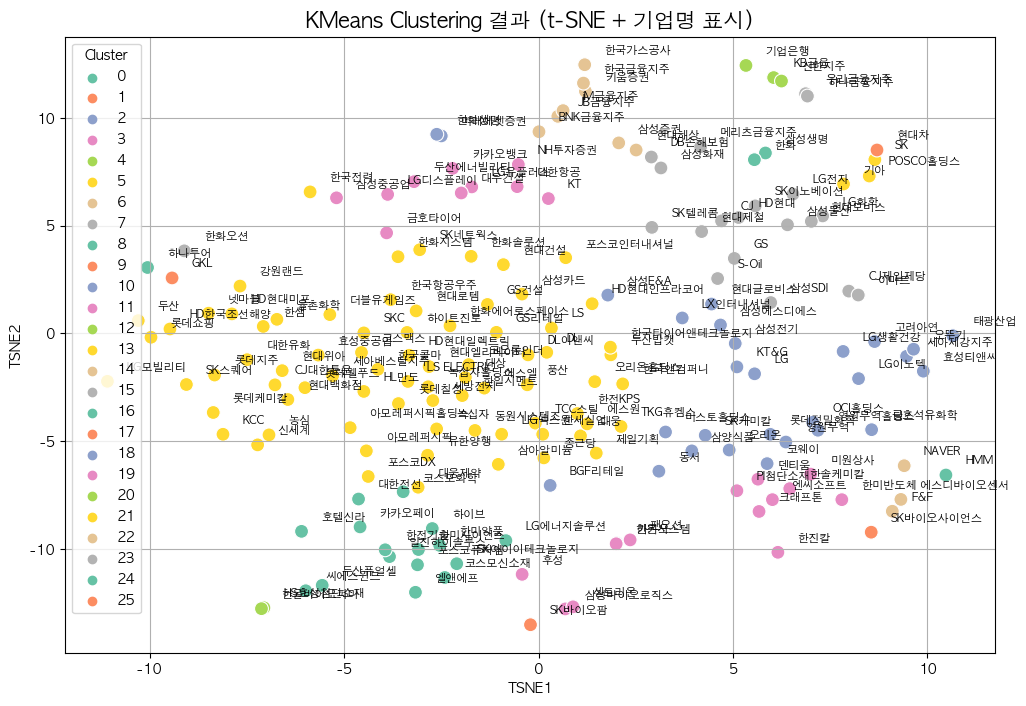

In [251]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled_df_2020_2022)

# 결과 DataFrame 생성
df_clustered = pd.DataFrame({
    '기업명': company_2020_2022.values,
    'Cluster': final_labels_2020_2022,  # ✅ 자동 선택된 클러스터 라벨 사용
    'TSNE1': X_tsne[:, 0],
    'TSNE2': X_tsne[:, 1]
})

# 시각화
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_clustered, x='TSNE1', y='TSNE2', hue='Cluster', palette='Set2', s=100)

# 기업명 라벨 추가
for i in range(df_clustered.shape[0]):
    plt.text(df_clustered['TSNE1'][i]+0.5, df_clustered['TSNE2'][i]+0.5, df_clustered['기업명'][i], fontsize=8)

# 제목 및 스타일
plt.title(f"{best_method} Clustering 결과 (t-SNE + 기업명 표시)", fontsize=15)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


### ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

### 최적의 K 찾기 (2021-2023) - 그래프

In [252]:
# # 상수항 추가 (VIF 계산 시 필요)
# X_with_const = sm.add_constant(X_scaled_df_2021_2023)

# # VIF 계산
# vif_data = pd.DataFrame()
# vif_data["Feature"] = X_with_const.columns
# vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) 
#                    for i in range(X_with_const.shape[1])]

# # 결과 확인
# vif_data.sort_values("VIF", ascending=False)

In [253]:
# # 'const' 제외하고 VIF ≤ 10 인 피처만 선택
# vif_threshold = 10
# valid_features = vif_data[(vif_data["Feature"] != "const") & (vif_data["VIF"] <= vif_threshold)]["Feature"]

# # 해당 피처들만 남긴 새로운 DataFrame 생성
# X_scaled_df_2021_2023 = X_scaled_df_2021_2023[valid_features]


### 최적의 K 찾기 (2021-2023) - 자동화

Best K for KMeans (lowest DBI): 28 -> DBI = 0.6626
Best K for GMM (lowest DBI): 28 -> DBI = 0.6661
Best K for Spectral Clustering (lowest DBI): 27 -> DBI = 1.3660


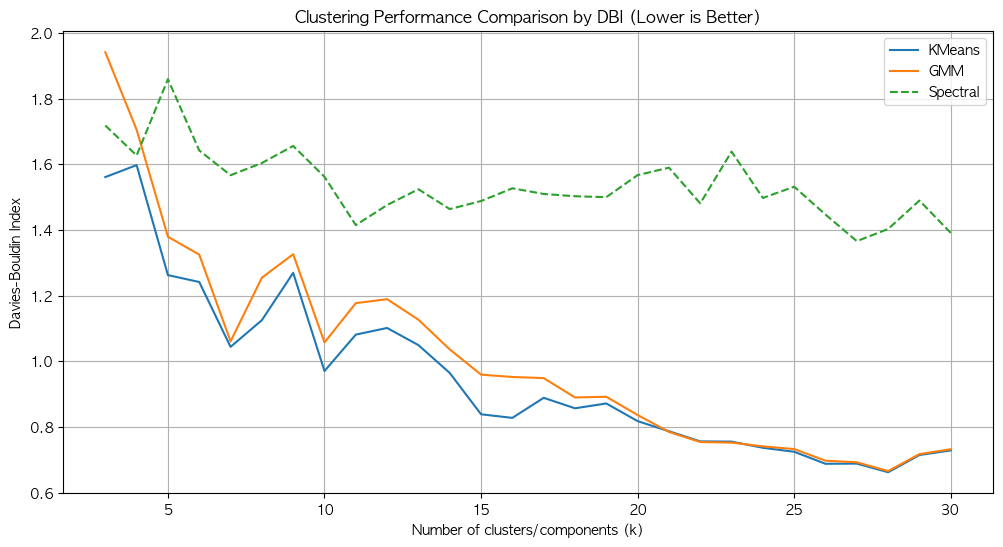

In [254]:
# 결과 저장
k_range = range(3, 31)

dbi_kmeans, dbi_gmm, dbi_spectral = [], [], []

labels_kmeans_all, labels_gmm_all, labels_spectral_all = {}, {}, {}

# 반복 수행
for k in k_range:
    # KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_labels_2021_2023 = kmeans.fit_predict(X_scaled_2021_2023)
    dbi_kmeans.append(davies_bouldin_score(X_scaled_df_2021_2023, kmeans_labels_2021_2023))
    labels_kmeans_all[k] = kmeans_labels_2021_2023

    # GMM
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels_2021_2023 = gmm.fit_predict(X_scaled_df_2021_2023)
    dbi_gmm.append(davies_bouldin_score(X_scaled_df_2021_2023, gmm_labels_2021_2023))
    labels_gmm_all[k] = gmm_labels_2021_2023

    # Spectral Clustering
    try:
        spectral = SpectralClustering(n_clusters=k, random_state=42, affinity='nearest_neighbors', assign_labels='kmeans')
        spectral_labels_2021_2023 = spectral.fit_predict(X_scaled_df_2021_2023)
        dbi_spectral.append(davies_bouldin_score(X_scaled_df_2021_2023, spectral_labels_2021_2023))
        labels_spectral_all[k] = spectral_labels_2021_2023

    except Exception:
        # 실패한 경우 큰 값으로 대체 (e.g., affinity 문제 등)
        dbi_spectral.append(np.inf)
        labels_spectral_all[k] = None


# 가장 낮은 DBI를 보이는 k 찾기
best_k_kmeans = k_range[np.argmin(dbi_kmeans)]
best_k_gmm = k_range[np.argmin(dbi_gmm)]
best_k_spectral = k_range[np.argmin(dbi_spectral)]

min_dbi_kmeans = min(dbi_kmeans)
min_dbi_gmm = min(dbi_gmm)
min_dbi_spectral = min(dbi_spectral)

# 3. 세 값 비교해서 최소값 및 방법 선택
dbi_dict = {
    'KMeans': (best_k_kmeans, min_dbi_kmeans),
    'GMM': (best_k_gmm, min_dbi_gmm),
    'Spectral': (best_k_spectral, min_dbi_spectral)
}

# 결과 출력
print(f"Best K for KMeans (lowest DBI): {best_k_kmeans} -> DBI = {min_dbi_kmeans:.4f}")
print(f"Best K for GMM (lowest DBI): {best_k_gmm} -> DBI = {min_dbi_gmm:.4f}")
print(f"Best K for Spectral Clustering (lowest DBI): {best_k_spectral} -> DBI = {min_dbi_spectral:.4f}")

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(k_range, dbi_kmeans, label='KMeans')
plt.plot(k_range, dbi_gmm, label='GMM')
plt.plot(k_range, dbi_spectral, label='Spectral', linestyle='--')
plt.xlabel('Number of clusters/components (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Clustering Performance Comparison by DBI (Lower is Better)')
plt.legend()
plt.grid(True)
plt.show()


### K-means, GMM, Sperctral Clustering 적용 및 비교

In [255]:
# # Window 2021-2023

# # K-means clustering
# # K-means는 k=28에서 가장 높은 점수를 보임
# kmeans = KMeans(n_clusters=28, random_state=42)
# kmeans_labels_2021_2023, kmeans_score_2021_2023 = evaluate_clustering(kmeans, X_scaled_df_2021_2023)

# # GMM
# # GMM은 k=28에서 가장 높은 점수를 보임
# gmm = GaussianMixture(n_components=28, random_state=42)
# gmm_labels_2021_2023, gmm_score_2021_2023 = evaluate_clustering(gmm, X_scaled_df_2021_2023, labels=gmm.fit_predict(X_scaled_df_2021_2023))

# # Spectral clustering
# # Spectral clustering은 거의 모든 k의 범위에서 평가가 낮게 나옴
# spectral = SpectralClustering(n_clusters=27, random_state=42, affinity='nearest_neighbors')
# spectral_labels_2021_2023, spectral_score_2021_2023 = evaluate_clustering(spectral, X_scaled_df_2021_2023)


# # Davies-Bouldin Index 계산
# # 보통 0.5 ~ 1.0 사이면 괜찮은 클러스터링이라고 함. 실무에서 자주 나오는 수준
# kmeans_dbi_2021_2023 = davies_bouldin_score(X_scaled_df_2021_2023, kmeans_labels_2021_2023)
# gmm_dbi_2021_2023 = davies_bouldin_score(X_scaled_df_2021_2023, gmm_labels_2021_2023)
# spectral_dbi_2021_2023 = davies_bouldin_score(X_scaled_df_2021_2023, spectral_labels_2021_2023)

# # 결과 비교 출력
# print(f"KMeans Davies-Bouldin Index: {kmeans_dbi_2021_2023:.4f}")
# print(f"GMM Davies-Bouldin Index: {gmm_dbi_2021_2023:.4f}")
# print(f"Spectral Davies-Bouldin Index: {spectral_dbi_2021_2023:.4f}")

# # # 결과 비교
# # print(f"KMeans Silhouette Score: {kmeans_score:.4f}")
# # print(f"GMM Silhouette Score: {gmm_score:.4f}")
# # print(f"Spectral Silhouette Score: {spectral_score:.4f}")


### 최종적으로 선택한 클러스터 결과 저장 (K-means)

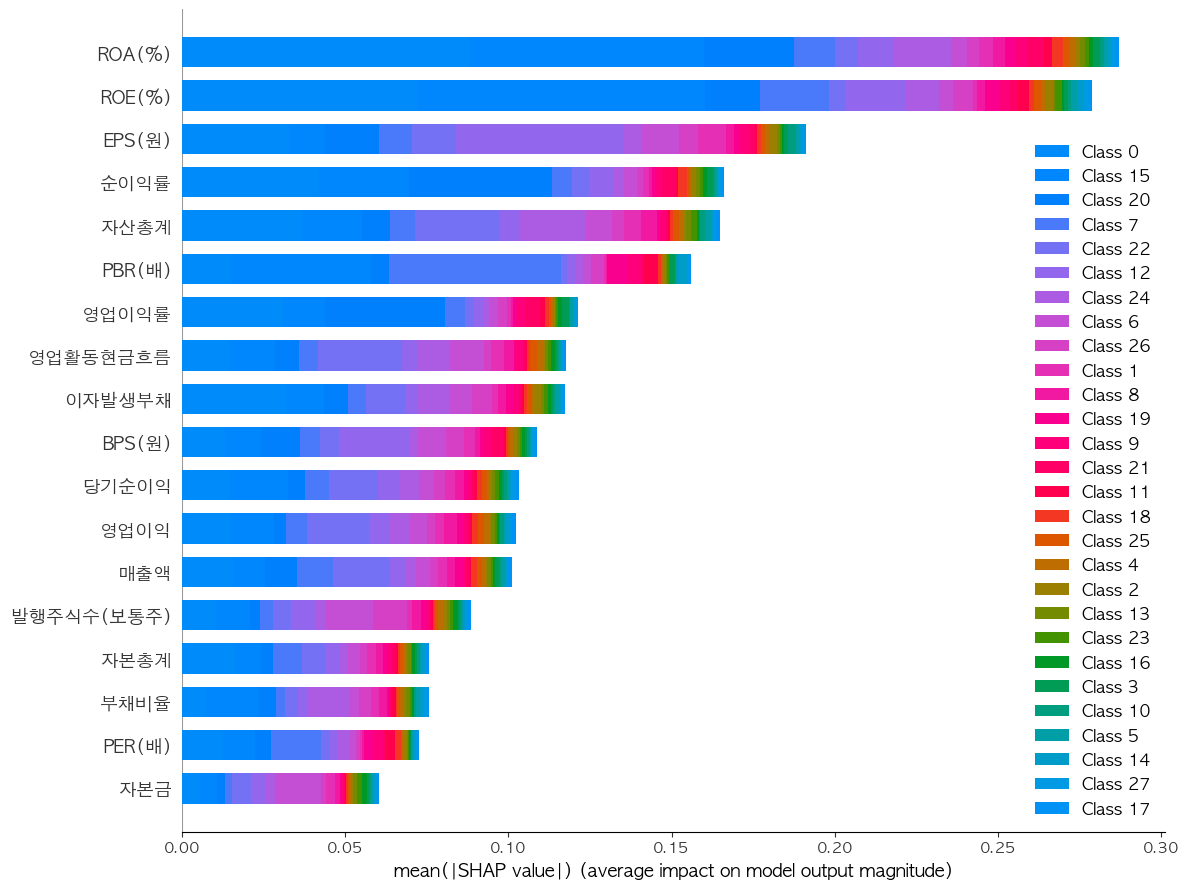

실제 사용된 클러스터 수: 28


In [256]:
best_method = min(dbi_dict, key=lambda k: dbi_dict[k][1])
best_k_method = dbi_dict[best_method][0]
best_dbi_value = dbi_dict[best_method][1]


if best_method == 'KMeans':
    final_labels_2021_2023 = labels_kmeans_all[best_k_method]
elif best_method == 'GMM':
    final_labels_2021_2023 = labels_gmm_all[best_k_method]
elif best_method == 'Spectral':
    final_labels_2021_2023 = labels_spectral_all[best_k_method]


# 데이터에 라벨 부착
df_2021_2023['Cluster'] = final_labels_2021_2023

# ✅ RandomForest 학습
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_scaled_df_2021_2023, final_labels_2021_2023)

# ✅ SHAP 분석
explainer = shap.TreeExplainer(clf)
shap_values_2021_2023 = explainer.shap_values(X_scaled_df_2021_2023)

# ✅ summary plot
shap.summary_plot(shap_values_2021_2023, X_scaled_df_2021_2023, plot_type="bar", show=False)
plt.gcf().set_size_inches(12, 9)
plt.tight_layout()
plt.show()

# ✅ 확인: 실제 클러스터 수
print("실제 사용된 클러스터 수:", len(np.unique(final_labels_2021_2023)))


In [257]:
# 클러스터별 SHAP 값의 평균 구하기
cluster_shap_means_2021_2023 = {}
unique_clusters_2021_2023 = np.unique(final_labels_2021_2023)

for cluster_id in unique_clusters_2021_2023:
    # 현재 클러스터에 속한 인덱스 추출
    cluster_indices = np.where(final_labels_2021_2023 == cluster_id)[0]
    
    # 해당 클러스터에 대한 SHAP 값만 선택
    cluster_shap_values = shap_values_2021_2023[cluster_indices]
    
    # SHAP 값의 절대값 평균 계산
    cluster_mean_shap = np.abs(cluster_shap_values).mean(axis=0)
    
    # 2차원 배열인 경우 1차원으로 변환 (첫 번째 차원만 사용하거나 적절히 처리)
    if len(cluster_mean_shap.shape) > 1:
        # 차원이 (14, 4)와 같이 2차원인 경우, 첫 번째 차원만 사용하거나 평탄화
        cluster_mean_shap = cluster_mean_shap.flatten() if cluster_mean_shap.size == len(X_scaled_df_2021_2023.columns) else cluster_mean_shap[:, 0]
    
    # 결과 저장
    cluster_shap_means_2021_2023[cluster_id] = cluster_mean_shap

# 모든 클래스에 대한 특성 중요도를 DataFrame으로 변환
feature_importance_df = pd.DataFrame(index=X_scaled_df_2021_2023.columns)

# 각 클래스별 중요도 추가
for cluster_id in unique_clusters_2021_2023:
    shap_arr = cluster_shap_means_2021_2023[cluster_id]
    # cluster_shap_means[cluster_id]의 길이가 X_raw.columns와 일치하는지 확인
    if len(shap_arr) != len(X_scaled_df_2021_2023.columns):
        print(f"경고: 클러스터 {cluster_id}의 SHAP 값 길이({len(shap_arr)})가 특성 수({len(X_scaled_df_2021_2023.columns)})와 일치하지 않습니다.")
        continue
    
    feature_importance_df[f'Class {cluster_id}'] = shap_arr

# 결과 출력 - 각 클래스별로 내림차순 정렬해서 보여주기
print("각 클래스별 특성 중요도 (SHAP 값 평균):")
display(feature_importance_df)

# 각 클래스별로 중요 특성 순위 확인
for cluster_id in unique_clusters_2021_2023:
    col = f'Class {cluster_id}'
    if col not in feature_importance_df.columns:
        print(f"\nClass {cluster_id}에 대한 특성 중요도를 계산할 수 없습니다.")
        continue
        
    print(f"\nClass {cluster_id}에 중요한 특성 순위:")
    sorted_feats = feature_importance_df[col].sort_values(ascending=False)
    for i, (feature, importance) in enumerate(sorted_feats.items(), 1):
        print(f"{i}. {feature}: {importance:.6f}")

각 클래스별 특성 중요도 (SHAP 값 평균):


,Class 0,Class 1,Class 2,Class 3,Class 4,Class 5,Class 6,Class 7,Class 8,Class 9,...,Class 18,Class 19,Class 20,Class 21,Class 22,Class 23,Class 24,Class 25,Class 26,Class 27
매출액,0.023299,0.018297,0.002758,0.033772,0.012491,0.006665,0.002971,0.026398,0.014316,0.019345,...,0.041109,0.025277,0.019202,0.005403,0.017911,0.000673,0.007157,0.008819,0.005642,0.004790
영업이익,0.022602,0.034124,0.000738,0.002191,0.029173,0.001857,0.011508,0.007296,0.029781,0.001083,...,0.009772,0.005614,0.010552,0.005832,0.028861,0.004250,0.011035,0.015484,0.004944,0.000103
당기순이익,0.022321,0.042177,0.004906,0.007482,0.022887,0.003779,0.008711,0.008218,0.022854,0.003839,...,0.001302,0.012680,0.009893,0.009190,0.029655,0.002661,0.006633,0.014685,0.003539,0.005379
자산총계,0.050012,0.077884,0.015528,0.000732,0.067076,0.037088,0.047241,0.012904,0.064829,0.003185,...,0.023791,0.009536,0.017767,0.020559,0.069221,0.029621,0.085218,0.045187,0.013424,0.012939
자본총계,0.021096,0.034454,0.007101,0.001087,0.026001,0.021437,0.018470,0.007984,0.024735,0.006675,...,0.002930,0.003906,0.011174,0.005845,0.034036,0.021705,0.009219,0.022988,0.007772,0.002083
자본금,0.009007,0.001514,0.001217,0.001893,0.013948,0.010218,0.026681,0.001992,0.007348,0.001526,...,0.005478,0.001466,0.002521,0.003175,0.002588,0.012768,0.002727,0.000112,0.005345,0.001773
영업활동현금흐름,0.019584,0.037944,0.001949,0.005629,0.027880,0.006027,0.027844,0.007925,0.024880,0.011886,...,0.004533,0.002549,0.005216,0.001932,0.039449,0.018415,0.010380,0.022161,0.006518,0.013414
이자발생부채,0.043322,0.038073,0.013028,0.005505,0.050358,0.028791,0.050756,0.014302,0.045859,0.009307,...,0.015841,0.010211,0.014898,0.015279,0.049143,0.029714,0.059638,0.028546,0.034497,0.026452
영업이익률,0.045452,0.011883,0.006417,0.063489,0.012548,0.005199,0.020402,0.010794,0.020603,0.034153,...,0.026843,0.005983,0.086209,0.103780,0.015488,0.005559,0.023006,0.008750,0.012986,0.005668
순이익률,0.060072,0.020339,0.021629,0.098480,0.013117,0.003740,0.018391,0.019330,0.020683,0.040936,...,0.172103,0.011736,0.116669,0.140892,0.018099,0.008965,0.018916,0.002935,0.010584,0.007659



Class 0에 중요한 특성 순위:
1. ROA(%): 0.126845
2. ROE(%): 0.093506
3. 순이익률: 0.060072
4. 자산총계: 0.050012
5. EPS(원): 0.047078
6. 영업이익률: 0.045452
7. 이자발생부채: 0.043322
8. 매출액: 0.023299
9. PBR(배): 0.022806
10. 영업이익: 0.022602
11. 당기순이익: 0.022321
12. 자본총계: 0.021096
13. 영업활동현금흐름: 0.019584
14. BPS(원): 0.019261
15. PER(배): 0.016863
16. 발행주식수(보통주): 0.014792
17. 부채비율: 0.010225
18. 자본금: 0.009007

Class 1에 중요한 특성 순위:
1. 자산총계: 0.077884
2. EPS(원): 0.061220
3. ROA(%): 0.048355
4. 당기순이익: 0.042177
5. 이자발생부채: 0.038073
6. 영업활동현금흐름: 0.037944
7. 자본총계: 0.034454
8. 영업이익: 0.034124
9. BPS(원): 0.029623
10. 순이익률: 0.020339
11. ROE(%): 0.018734
12. 매출액: 0.018297
13. 영업이익률: 0.011883
14. PBR(배): 0.005195
15. 발행주식수(보통주): 0.004759
16. PER(배): 0.004009
17. 자본금: 0.001514
18. 부채비율: 0.001473

Class 2에 중요한 특성 순위:
1. ROE(%): 0.080483
2. EPS(원): 0.076099
3. ROA(%): 0.069035
4. BPS(원): 0.032431
5. 순이익률: 0.021629
6. 자산총계: 0.015528
7. 이자발생부채: 0.013028
8. 부채비율: 0.012257
9. PER(배): 0.009714
10. 발행주식수(보통주): 0.008474
11. 자본총계: 0.007101
12. 영

### 위에 결과를 보면 각 class 별로 잘 주요한 feature가 나온 것을 확인할 수 있다.

In [258]:
# 클러스터별 기업 리스트를 출력한다.
for cluster_id in unique_clusters_2021_2023:
    print(f"[클러스터 {cluster_id}에 속한 종목들]:")
    stock_list = company_2021_2023[final_labels_2021_2023 == cluster_id].values
    print(", ".join(stock_list))


[클러스터 0에 속한 종목들]:
BGF리테일, DL이앤씨, HD현대인프라코어, HD현대일렉트릭, HS효성첨단소재, KG모빌리티, LG생활건강, LIG넥스원, LS, LS ELECTRIC, LX인터내셔널, PI첨단소재, SK케미칼, TKG휴켐스, 강원랜드, 농심, 대웅, 대웅제약, 대한전선, 동원시스템즈, 두산밥캣, 롯데칠성, 미스토홀딩스, 삼성E&A, 삼성에스디에스, 삼성전기, 세방전지, 세아베스틸지주, 에스엘, 에스원, 오리온홀딩스, 유한양행, 제일기획, 코스맥스, 포스코인터내셔널, 풍산, 한국타이어앤테크놀로지, 한국항공우주, 한미사이언스, 한미약품, 한세실업, 한일시멘트, 한전KPS, 한화시스템, 한화에어로스페이스, 현대글로비스, 현대로템, 현대엘리베이터, 현대해상, 효성중공업
[클러스터 1에 속한 종목들]:
LG화학, POSCO홀딩스, 현대모비스
[클러스터 2에 속한 종목들]:
태광산업
[클러스터 3에 속한 종목들]:
한미반도체
[클러스터 4에 속한 종목들]:
우리금융지주
[클러스터 5에 속한 종목들]:
한국전력
[클러스터 6에 속한 종목들]:
LG유플러스, NH투자증권, 대우건설, 대한항공, 두산에너빌리티, 미래에셋증권, 카카오뱅크, 한화생명
[클러스터 7에 속한 종목들]:
HD현대중공업, SK바이오사이언스, SK아이이테크놀로지, TCC스틸, 두산퓨얼셀, 삼아알미늄, 씨에스윈드, 엘앤에프, 일진하이솔루스, 코스모신소재, 코스모화학, 포스코퓨처엠, 하이브, 한전기술, 호텔신라, 후성
[클러스터 8에 속한 종목들]:
KB금융, 신한지주, 하나금융지주
[클러스터 9에 속한 종목들]:
SK바이오팜, 포스코DX
[클러스터 10에 속한 종목들]:
현대차
[클러스터 11에 속한 종목들]:
에코프로머티
[클러스터 12에 속한 종목들]:
CJ제일제당, LG이노텍, NAVER, OCI홀딩스, 고려아연, 금호석유화학, 삼성SDI, 삼성화재, 세아제강지주, 신세계, 영원무역홀딩스, 오뚜기, 효성티앤씨
[클러스터 13에 속한 종목들]:
기업은행
[클러스터 14에 속한 종목들]

### K-means 클러스터링 결과에 종목명을 포함해서 시각화

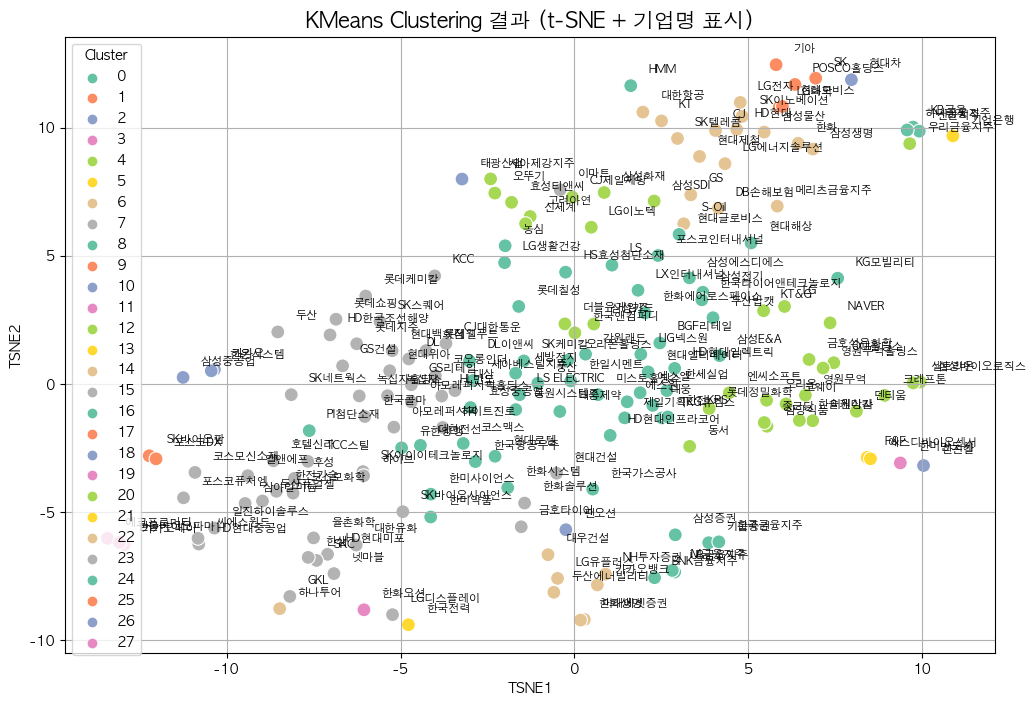

In [259]:
# t-SNE 적용
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled_df_2021_2023)

# 결과 DataFrame 생성
df_clustered = pd.DataFrame({
    '기업명': company_2021_2023.values,
    'Cluster': final_labels_2021_2023,
    'TSNE1': X_tsne[:, 0],
    'TSNE2': X_tsne[:, 1]
})

# 시각화
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_clustered, x='TSNE1', y='TSNE2', hue='Cluster', palette='Set2', s=100)

# 기업명 라벨 추가
for i in range(df_clustered.shape[0]):
    plt.text(df_clustered['TSNE1'][i]+0.5, df_clustered['TSNE2'][i]+0.5, df_clustered['기업명'][i], fontsize=8)

# 제목 및 스타일
plt.title("KMeans Clustering 결과 (t-SNE + 기업명 표시)", fontsize=15)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


### ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

### 최적의 K 찾기 (2022-2024) - 그래프

In [260]:
# # 상수항 추가 (VIF 계산 시 필요)
# X_with_const = sm.add_constant(X_scaled_df_2022_2024)

# # VIF 계산
# vif_data = pd.DataFrame()
# vif_data["Feature"] = X_with_const.columns
# vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) 
#                    for i in range(X_with_const.shape[1])]

# # 결과 확인
# vif_data.sort_values("VIF", ascending=False)

In [261]:
# # 'const' 제외하고 VIF ≤ 10 인 피처만 선택
# vif_threshold = 10
# valid_features = vif_data[(vif_data["Feature"] != "const") & (vif_data["VIF"] <= vif_threshold)]["Feature"]

# # 해당 피처들만 남긴 새로운 DataFrame 생성
# X_scaled_df_2022_2024 = X_scaled_df_2022_2024[valid_features]


### 최적의 K 찾기 (2022-2024) - 자동화

Best K for KMeans (lowest DBI): 22 -> DBI = 0.7969
Best K for GMM (lowest DBI): 23 -> DBI = 0.8082
Best K for Spectral Clustering (lowest DBI): 28 -> DBI = 1.3121


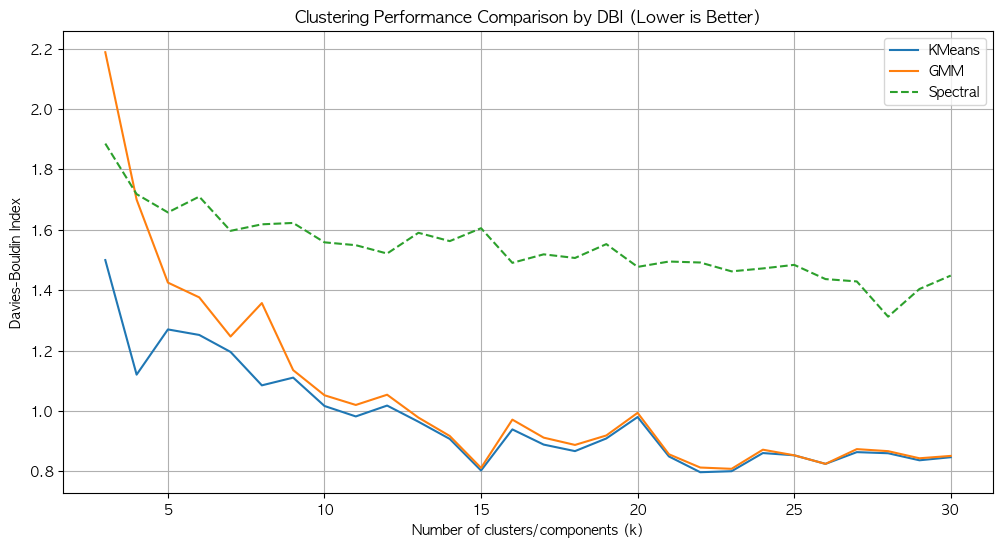

In [262]:
# 결과 저장
k_range = range(3, 31)

dbi_kmeans, dbi_gmm, dbi_spectral = [], [], []

labels_kmeans_all, labels_gmm_all, labels_spectral_all = {}, {}, {}

# 반복 수행
for k in k_range:
    # KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_labels_2022_2024 = kmeans.fit_predict(X_scaled_2022_2024)
    dbi_kmeans.append(davies_bouldin_score(X_scaled_df_2022_2024, kmeans_labels_2022_2024))
    labels_kmeans_all[k] = kmeans_labels_2022_2024

    # GMM
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels_2022_2024 = gmm.fit_predict(X_scaled_df_2022_2024)
    dbi_gmm.append(davies_bouldin_score(X_scaled_df_2022_2024, gmm_labels_2022_2024))
    labels_gmm_all[k] = gmm_labels_2022_2024

    # Spectral Clustering
    try:
        spectral = SpectralClustering(n_clusters=k, random_state=42, affinity='nearest_neighbors', assign_labels='kmeans')
        spectral_labels_2022_2024 = spectral.fit_predict(X_scaled_df_2022_2024)
        dbi_spectral.append(davies_bouldin_score(X_scaled_df_2022_2024, spectral_labels_2022_2024))
        labels_spectral_all[k] = spectral_labels_2022_2024

    except Exception:
        # 실패한 경우 큰 값으로 대체 (e.g., affinity 문제 등)
        dbi_spectral.append(np.inf)
        labels_spectral_all[k] = None


# 가장 낮은 DBI를 보이는 k 찾기
best_k_kmeans = k_range[np.argmin(dbi_kmeans)]
best_k_gmm = k_range[np.argmin(dbi_gmm)]
best_k_spectral = k_range[np.argmin(dbi_spectral)]

min_dbi_kmeans = min(dbi_kmeans)
min_dbi_gmm = min(dbi_gmm)
min_dbi_spectral = min(dbi_spectral)

# 3. 세 값 비교해서 최소값 및 방법 선택
dbi_dict = {
    'KMeans': (best_k_kmeans, min_dbi_kmeans),
    'GMM': (best_k_gmm, min_dbi_gmm),
    'Spectral': (best_k_spectral, min_dbi_spectral)
}

# 결과 출력
print(f"Best K for KMeans (lowest DBI): {best_k_kmeans} -> DBI = {min_dbi_kmeans:.4f}")
print(f"Best K for GMM (lowest DBI): {best_k_gmm} -> DBI = {min_dbi_gmm:.4f}")
print(f"Best K for Spectral Clustering (lowest DBI): {best_k_spectral} -> DBI = {min_dbi_spectral:.4f}")

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(k_range, dbi_kmeans, label='KMeans')
plt.plot(k_range, dbi_gmm, label='GMM')
plt.plot(k_range, dbi_spectral, label='Spectral', linestyle='--')
plt.xlabel('Number of clusters/components (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Clustering Performance Comparison by DBI (Lower is Better)')
plt.legend()
plt.grid(True)
plt.show()


### K-means, GMM, Sperctral Clustering 적용 및 비교

In [263]:
# # Window 2021-2023

# # K-means clustering
# # K-means는 k=3에서 가장 높은 점수를 보임
# kmeans = KMeans(n_clusters=3, random_state=42)
# kmeans_labels_2022_2024, kmeans_score_2022_2024 = evaluate_clustering(kmeans, X_scaled_df_2022_2024)

# # GMM
# # GMM은 k=23에서 가장 높은 점수를 보임
# gmm = GaussianMixture(n_components=23, random_state=42)
# gmm_labels_2022_2024, gmm_score_2022_2024 = evaluate_clustering(gmm, X_scaled_df_2022_2024, labels=gmm.fit_predict(X_scaled_df_2022_2024))

# # Spectral clustering
# # Spectral clustering은 거의 모든 k의 범위에서 평가가 낮게 나옴
# spectral = SpectralClustering(n_clusters=28, random_state=42, affinity='nearest_neighbors')
# spectral_labels_2022_2024, spectral_score_2022_2024 = evaluate_clustering(spectral, X_scaled_df_2022_2024)


# # Davies-Bouldin Index 계산
# # 보통 0.5 ~ 1.0 사이면 괜찮은 클러스터링이라고 함. 실무에서 자주 나오는 수준
# kmeans_dbi_2022_2024 = davies_bouldin_score(X_scaled_df_2022_2024, kmeans_labels_2022_2024)
# gmm_dbi_2022_2024 = davies_bouldin_score(X_scaled_df_2022_2024, gmm_labels_2022_2024)
# spectral_dbi_2022_2024 = davies_bouldin_score(X_scaled_df_2022_2024, spectral_labels_2022_2024)

# # 결과 비교 출력
# print(f"KMeans Davies-Bouldin Index: {kmeans_dbi_2022_2024:.4f}")
# print(f"GMM Davies-Bouldin Index: {gmm_dbi_2022_2024:.4f}")
# print(f"Spectral Davies-Bouldin Index: {spectral_dbi_2022_2024:.4f}")

# # # 결과 비교
# # print(f"KMeans Silhouette Score: {kmeans_score:.4f}")
# # print(f"GMM Silhouette Score: {gmm_score:.4f}")
# # print(f"Spectral Silhouette Score: {spectral_score:.4f}")


### 최종적으로 선택한 클러스터 결과 저장 (K-means)

### SHAP 해석

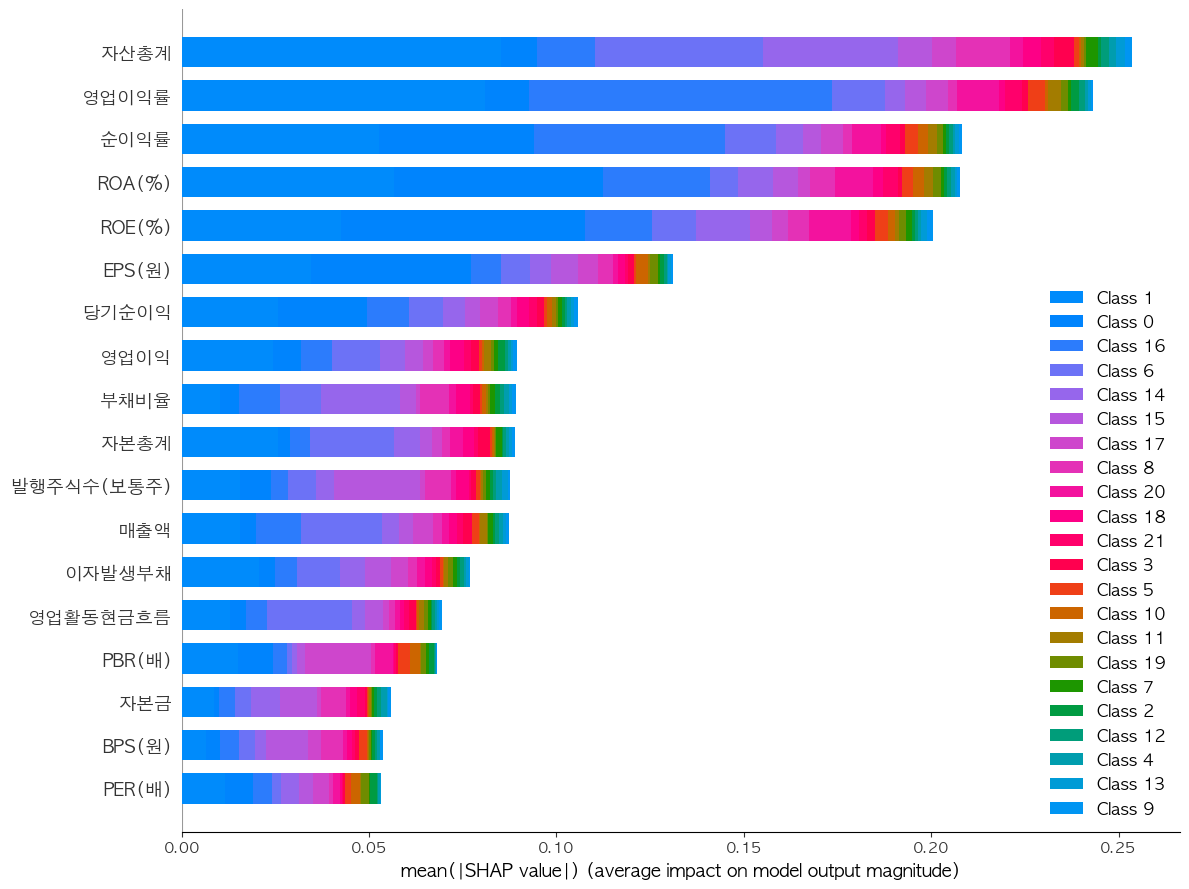

실제 사용된 클러스터 수: 22


In [264]:
best_method = min(dbi_dict, key=lambda k: dbi_dict[k][1])
best_k_method = dbi_dict[best_method][0]
best_dbi_value = dbi_dict[best_method][1]


if best_method == 'KMeans':
    final_labels_2022_2024 = labels_kmeans_all[best_k_method]
elif best_method == 'GMM':
    final_labels_2022_2024 = labels_gmm_all[best_k_method]
elif best_method == 'Spectral':
    final_labels_2022_2024 = labels_spectral_all[best_k_method]


# 데이터에 라벨 부착
df_2022_2024['Cluster'] = final_labels_2022_2024

# ✅ RandomForest 학습
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_scaled_df_2022_2024, final_labels_2022_2024)

# ✅ SHAP 분석
explainer = shap.TreeExplainer(clf)
shap_values_2022_2024 = explainer.shap_values(X_scaled_df_2022_2024)

# ✅ summary plot
shap.summary_plot(shap_values_2022_2024, X_scaled_df_2022_2024, plot_type="bar", show=False)
plt.gcf().set_size_inches(12, 9)
plt.tight_layout()
plt.show()

# ✅ 확인: 실제 클러스터 수
print("실제 사용된 클러스터 수:", len(np.unique(final_labels_2022_2024)))


In [265]:
# 클러스터별 SHAP 값의 평균 구하기
cluster_shap_means_2022_2024 = {}
unique_clusters_2022_2024 = np.unique(final_labels_2022_2024)

for cluster_id in unique_clusters_2022_2024:
    # 현재 클러스터에 속한 인덱스 추출
    cluster_indices = np.where(final_labels_2022_2024 == cluster_id)[0]
    
    # 해당 클러스터에 대한 SHAP 값만 선택
    cluster_shap_values = shap_values_2022_2024[cluster_indices]
    
    # SHAP 값의 절대값 평균 계산
    cluster_mean_shap = np.abs(cluster_shap_values).mean(axis=0)
    
    # 2차원 배열인 경우 1차원으로 변환 (첫 번째 차원만 사용하거나 적절히 처리)
    if len(cluster_mean_shap.shape) > 1:
        # 차원이 (14, 4)와 같이 2차원인 경우, 첫 번째 차원만 사용하거나 평탄화
        cluster_mean_shap = cluster_mean_shap.flatten() if cluster_mean_shap.size == len(X_scaled_df_2022_2024.columns) else cluster_mean_shap[:, 0]
    
    # 결과 저장
    cluster_shap_means_2022_2024[cluster_id] = cluster_mean_shap

# 모든 클래스에 대한 특성 중요도를 DataFrame으로 변환
feature_importance_df = pd.DataFrame(index=X_scaled_df_2022_2024.columns)

# 각 클래스별 중요도 추가
for cluster_id in unique_clusters_2022_2024:
    shap_arr = cluster_shap_means_2022_2024[cluster_id]
    # cluster_shap_means[cluster_id]의 길이가 X_raw.columns와 일치하는지 확인
    if len(shap_arr) != len(X_scaled_df_2022_2024.columns):
        print(f"경고: 클러스터 {cluster_id}의 SHAP 값 길이({len(shap_arr)})가 특성 수({len(X_scaled_df_2022_2024.columns)})와 일치하지 않습니다.")
        continue
    
    feature_importance_df[f'Class {cluster_id}'] = shap_arr

# 결과 출력 - 각 클래스별로 내림차순 정렬해서 보여주기
print("각 클래스별 특성 중요도 (SHAP 값 평균):")
display(feature_importance_df)

# 각 클래스별로 중요 특성 순위 확인
for cluster_id in unique_clusters_2022_2024:
    col = f'Class {cluster_id}'
    if col not in feature_importance_df.columns:
        print(f"\nClass {cluster_id}에 대한 특성 중요도를 계산할 수 없습니다.")
        continue
        
    print(f"\nClass {cluster_id}에 중요한 특성 순위:")
    sorted_feats = feature_importance_df[col].sort_values(ascending=False)
    for i, (feature, importance) in enumerate(sorted_feats.items(), 1):
        print(f"{i}. {feature}: {importance:.6f}")

각 클래스별 특성 중요도 (SHAP 값 평균):


,Class 0,Class 1,Class 2,Class 3,Class 4,Class 5,Class 6,Class 7,Class 8,Class 9,...,Class 12,Class 13,Class 14,Class 15,Class 16,Class 17,Class 18,Class 19,Class 20,Class 21
매출액,0.008300,0.001191,0.000350,0.033054,0.002887,0.000701,0.009191,0.013031,0.002284,0.010373,...,0.001731,0.063683,0.003013,0.003134,0.001233,0.002959,0.009733,0.001903,0.001189,0.001382
영업이익,0.019400,0.002197,0.017291,0.019884,0.011913,0.001117,0.010891,0.009081,0.009461,0.007807,...,0.011055,0.013712,0.008834,0.007503,0.003031,0.004792,0.014057,0.010750,0.002727,0.006246
당기순이익,0.062527,0.013460,0.007849,0.029690,0.013796,0.008566,0.024476,0.016339,0.017713,0.015307,...,0.013335,0.028236,0.019585,0.019830,0.013490,0.021811,0.017464,0.047038,0.012109,0.017228
자산총계,0.022516,0.001496,0.002992,0.057627,0.026681,0.001834,0.015118,0.018539,0.021754,0.011677,...,0.025884,0.080057,0.015938,0.004660,0.002412,0.007708,0.031714,0.003744,0.001856,0.003076
자본총계,0.008219,0.001077,0.003280,0.023009,0.002667,0.000681,0.004736,0.004166,0.001547,0.004158,...,0.002188,0.018376,0.001506,0.002133,0.001073,0.006274,0.005742,0.001128,0.000820,0.000896
자본금,0.003146,0.000489,0.005900,0.000409,0.002447,0.000224,0.000613,0.000413,0.002202,0.000551,...,0.002379,0.012783,0.000791,0.003303,0.000397,0.001858,0.001182,0.001936,0.000565,0.000413
영업활동현금흐름,0.008653,0.000834,0.000287,0.028463,0.000779,0.000298,0.013375,0.001870,0.002118,0.008308,...,0.001228,0.040293,0.003480,0.003172,0.000597,0.002142,0.006328,0.013488,0.000462,0.000386
이자발생부채,0.011428,0.001187,0.001361,0.022712,0.007037,0.002221,0.005732,0.005171,0.001684,0.001517,...,0.007507,0.040140,0.002390,0.002292,0.001591,0.006428,0.007944,0.022515,0.001625,0.000975
영업이익률,0.033649,0.004800,0.023225,0.002591,0.006728,0.013187,0.004946,0.002076,0.007710,0.006359,...,0.009704,0.023836,0.005661,0.009275,0.011901,0.013898,0.006303,0.008723,0.011636,0.011658
순이익률,0.098911,0.028238,0.034127,0.028959,0.027901,0.026231,0.030286,0.024386,0.032311,0.025950,...,0.028778,0.055369,0.031666,0.033009,0.033272,0.032357,0.027601,0.050368,0.030252,0.033165



Class 0에 중요한 특성 순위:
1. ROE(%): 0.173106
2. ROA(%): 0.134320
3. EPS(원): 0.110769
4. 순이익률: 0.098911
5. 당기순이익: 0.062527
6. 영업이익률: 0.033649
7. PER(배): 0.024292
8. 자산총계: 0.022516
9. 영업이익: 0.019400
10. PBR(배): 0.019207
11. 발행주식수(보통주): 0.017745
12. 이자발생부채: 0.011428
13. 부채비율: 0.011318
14. BPS(원): 0.009356
15. 영업활동현금흐름: 0.008653
16. 매출액: 0.008300
17. 자본총계: 0.008219
18. 자본금: 0.003146

Class 1에 중요한 특성 순위:
1. ROA(%): 0.046648
2. ROE(%): 0.045761
3. EPS(원): 0.029870
4. 순이익률: 0.028238
5. 당기순이익: 0.013460
6. 영업이익률: 0.004800
7. PBR(배): 0.003295
8. 발행주식수(보통주): 0.002444
9. 영업이익: 0.002197
10. PER(배): 0.001709
11. 부채비율: 0.001652
12. 자산총계: 0.001496
13. 매출액: 0.001191
14. 이자발생부채: 0.001187
15. 자본총계: 0.001077
16. BPS(원): 0.001037
17. 영업활동현금흐름: 0.000834
18. 자본금: 0.000489

Class 2에 중요한 특성 순위:
1. ROE(%): 0.053045
2. ROA(%): 0.049271
3. EPS(원): 0.038340
4. 순이익률: 0.034127
5. 영업이익률: 0.023225
6. 영업이익: 0.017291
7. PER(배): 0.011835
8. 당기순이익: 0.007849
9. PBR(배): 0.006275
10. 자본금: 0.005900
11. 자본총계: 0.003280
12. 자산총계: 0.

### 위에 결과를 보면 각 class 별로 잘 주요한 feature가 나온 것을 확인할 수 있다.

In [266]:
# 클러스터별 기업 리스트를 출력한다.
for cluster_id in unique_clusters_2022_2024:
    print(f"[클러스터 {cluster_id}에 속한 종목들]:")
    stock_list = company_2022_2024[final_labels_2022_2024 == cluster_id].values
    print(", ".join(stock_list))


[클러스터 0에 속한 종목들]:
DL, GS건설, GS리테일, HD현대미포, KG모빌리티, LG디스플레이, SKC, SK네트웍스, SK바이오사이언스, 넷마블, 녹십자, 녹십자홀딩스, 대한유화, 두산, 두산퓨얼셀, 롯데쇼핑, 롯데지주, 롯데케미칼, 삼아알미늄, 엘앤에프, 율촌화학, 이마트, 일진하이솔루스, 카카오, 코스모화학, 한화솔루션, 한화오션, 현대건설, 현대백화점, 호텔신라, 후성
[클러스터 1에 속한 종목들]:
BGF리테일, CJ대한통운, DL이앤씨, GKL, HD현대인프라코어, HD현대중공업, HL만도, HS효성첨단소재, KCC, LG생활건강, LG이노텍, LIG넥스원, LS, LS ELECTRIC, LX인터내셔널, PI첨단소재, SK아이이테크놀로지, SK케미칼, TCC스틸, TKG휴켐스, 고려아연, 금호석유화학, 농심, 대상, 대웅, 대웅제약, 대한전선, 동원시스템즈, 롯데웰푸드, 롯데정밀화학, 롯데칠성, 미스토홀딩스, 삼성에스디에스, 삼성전기, 세방전지, 세아베스틸지주, 세아제강지주, 신세계, 씨에스윈드, 아모레퍼시픽, 아모레퍼시픽홀딩스, 에스엘, 에스원, 엔씨소프트, 오뚜기, 유한양행, 제일기획, 코스맥스, 코오롱인더, 포스코인터내셔널, 풍산, 하이브, 하이트진로, 한국콜마, 한국항공우주, 한미사이언스, 한샘, 한세실업, 한전기술, 한화시스템, 현대글로비스, 현대로템, 현대엘리베이터, 현대위아, 효성중공업, 효성티앤씨
[클러스터 2에 속한 종목들]:
태광산업
[클러스터 3에 속한 종목들]:
POSCO홀딩스, SK
[클러스터 4에 속한 종목들]:
우리금융지주
[클러스터 5에 속한 종목들]:
SK바이오팜, 한미반도체
[클러스터 6에 속한 종목들]:
CJ, CJ제일제당, GS, HD한국조선해양, HD현대, KT, LG에너지솔루션, LG전자, LG화학, S-Oil, SK이노베이션, SK텔레콤, 삼성SDI, 삼성물산, 한국가스공사, 한화, 현대모비스, 현대제철
[클러스터 7에 속한 종목들]:
현대차
[클러스터 8에 속한 종목들]:
BNK금융지주, NH투자

### K-means 클러스터링 결과에 종목명을 포함해서 시각화

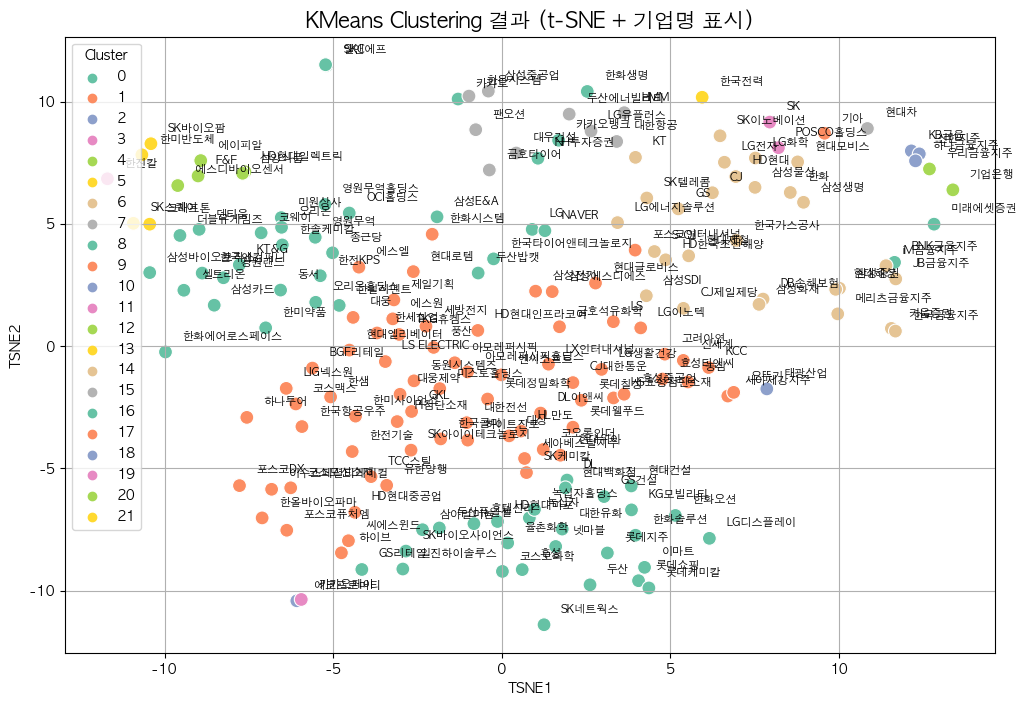

In [267]:
# t-SNE 적용
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled_df_2022_2024)

# 결과 DataFrame 생성
df_clustered = pd.DataFrame({
    '기업명': company_2022_2024.values,
    'Cluster': final_labels_2022_2024,
    'TSNE1': X_tsne[:, 0],
    'TSNE2': X_tsne[:, 1]
})

# 시각화
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_clustered, x='TSNE1', y='TSNE2', hue='Cluster', palette='Set2', s=100)

# 기업명 라벨 추가
for i in range(df_clustered.shape[0]):
    plt.text(df_clustered['TSNE1'][i]+0.5, df_clustered['TSNE2'][i]+0.5, df_clustered['기업명'][i], fontsize=8)

# 제목 및 스타일
plt.title("KMeans Clustering 결과 (t-SNE + 기업명 표시)", fontsize=15)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


# 포트폴리오 최적화

## Inter Cluster Portfolio vs. Random Sampling Portfolio

## Evaluation Using Sharpe Ratio, Sortino Ratio, and CVaR

### 자산 데이터 수집 및 로그 수익률 변환

In [268]:
#자산들 목록 보기
import FinanceDataReader as fdr
from tqdm import tqdm
import datetime

# 1. 세 윈도우에서 기업명 합집합 만들기
companies_2020_2022 = set(df_2020_2022['기업명_그룹'])
companies_2021_2023 = set(df_2021_2023['기업명_그룹'])
companies_2022_2024 = set(df_2022_2024['기업명_그룹'])

all_companies = companies_2020_2022.union(companies_2021_2023).union(companies_2022_2024)
company_list = sorted(all_companies)

krx_listed = fdr.StockListing('KRX')

# 기업명과 티커 매핑
company_ticker_map = {}
for name in company_list:
    match = krx_listed[krx_listed['Name'] == name]
    if not match.empty:
        code = match.iloc[0]['Code']
        company_ticker_map[name] = code
    else:
        print(f"매칭되지 않은 기업명: {name}")

# 매핑 결과 확인
print("매핑된 기업 수:", len(company_ticker_map))


매핑된 기업 수: 195


In [269]:
start_date = '2020-01-01'
end_date = '2024-12-31'

# 종가 데이터를 담을 딕셔너리
close_price_dict = {}
failed_companies = []

# tqdm으로 진행 상황 출력
for name, ticker in tqdm(company_ticker_map.items(), desc="📈 종가 수집 중"):
    try:
        df = fdr.DataReader(ticker, start=start_date, end=end_date)
        if 'Close' in df.columns and not df['Close'].isna().all():
            close_price_dict[name] = df['Close']
        else:
            failed_companies.append(name)
    except Exception as e:
        failed_companies.append(name)
        print(f"{name} 데이터 수집 실패: {e}")

# 딕셔너리를 하나의 데이터프레임으로 결합
price_df = pd.DataFrame(close_price_dict)

📈 종가 수집 중: 100%|██████████| 195/195 [00:19<00:00,  9.84it/s]


In [270]:
price_df

,BGF리테일,BNK금융지주,CJ,CJ대한통운,CJ제일제당,DB손해보험,DL,DL이앤씨,F&F,GKL,...,현대백화점,현대엘리베이터,현대위아,현대제철,현대차,현대해상,호텔신라,효성중공업,효성티앤씨,후성
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,168500,7470,93800,152500,245000,50100,79337,NaN,NaN,19450,...,85900,45083,48950,31200,118000,25900,94000,26900,152500,7940
2020-01-03,169000,7490,92600,148000,241000,50800,79337,NaN,NaN,19600,...,85600,45083,47800,30800,116000,25450,95300,27200,152000,8018
2020-01-06,166500,7350,90300,147000,233500,50200,75994,NaN,NaN,19050,...,84000,43416,46750,29650,116000,25350,94900,26100,149500,7783
2020-01-07,169500,7430,91100,147000,234000,49750,76988,NaN,NaN,20000,...,88900,43682,46250,29500,115500,25600,99400,26200,150500,7891
2020-01-08,169500,7330,90900,143500,229500,48550,74639,NaN,NaN,19700,...,87300,41348,44750,28200,112000,25050,97300,24550,145000,7510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,107700,10630,107900,82500,265000,104700,33800,33100.0,54900.0,11350,...,48800,59100,39350,21750,215000,25250,38250,424500,239500,5110
2024-12-24,107000,10730,102200,82200,264500,105600,33800,32950.0,53700.0,11350,...,49100,59500,39250,21700,216500,25600,38250,393000,245500,5000
2024-12-26,105400,10590,102100,81200,261000,105300,33550,32400.0,54000.0,11340,...,48150,58600,39000,21350,217500,25450,37550,389500,241500,4945


In [271]:
# 3. 연도 필터링 함수
price_2020_2022 = price_df.loc["2020-01-01":"2022-12-31"]
price_2021_2023 = price_df.loc["2021-01-01":"2023-12-31"]
price_2022_2024 = price_df.loc["2022-01-01":"2024-12-31"]

# 5. 저장
# price_df.to_csv("../csv/log_returns_total.csv")

price_2020_2022 = price_2020_2022.astype(float)
price_2021_2023 = price_2021_2023.astype(float)
price_2022_2024 = price_2022_2024.astype(float)

log_ret_2020_2022 = np.log(price_2020_2022 / price_2020_2022.shift(1))
log_ret_2020_2022 = log_ret_2020_2022.bfill()

log_ret_2021_2023 = np.log(price_2021_2023 / price_2021_2023.shift(1))
log_ret_2021_2023 = log_ret_2021_2023.bfill()

log_ret_2022_2024 = np.log(price_2022_2024 / price_2022_2024.shift(1))
log_ret_2022_2024 = log_ret_2022_2024.bfill()

# log_ret_2020_2022.to_csv("../csv/log_return_2020_2022.csv", encoding="utf-8-sig")
# log_ret_2021_2023.to_csv("../csv/log_return_2021_2023.csv", encoding="utf-8-sig")
# log_ret_2022_2024.to_csv("../csv/log_return_2022_2024.csv", encoding="utf-8-sig")


#### Markowitz Min-Variance Model

In [272]:
# 1. 최소 분산 모델
def markowitz_min_variance(returns: pd.DataFrame, target_return: float = 0.01):
    mean_returns = returns.mean().values
    cov_matrix = returns.cov().values
    num_assets = len(mean_returns)

    # 포트폴리오 분산 (리스크) 계산
    def portfolio_variance(weights):
        return weights.T @ cov_matrix @ weights

    # 제약조건: 총합 = 1, 기대 수익률 ≥ target_return
    constraints = [
        {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},
        {'type': 'ineq', 'fun': lambda w: w @ mean_returns - target_return}
    ]

    # 비중 범위 (0~1)
    bounds = tuple((0, 1) for _ in range(num_assets))
    init_guess = np.repeat(1 / num_assets, num_assets)

    result = minimize(portfolio_variance, init_guess, method='SLSQP', bounds=bounds, constraints=constraints)

    if result.success:
        return result.x
    else:
        raise ValueError("최적화 실패: ", result.message)
        

# 2. 최대 샤프비율 모델
def markowitz_max_sharpe(returns: pd.DataFrame, risk_free_rate: float = 0.02):
    mean_returns = returns.mean().values
    cov_matrix = returns.cov().values
    num_assets = len(mean_returns)

    def negative_sharpe(weights):
        port_return = weights @ mean_returns
        port_vol = np.sqrt(weights.T @ cov_matrix @ weights)
        return -(port_return - risk_free_rate) / port_vol  # negative because we minimize

    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = tuple((0, 1) for _ in range(num_assets))
    init_guess = np.repeat(1 / num_assets, num_assets)

    result = minimize(negative_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=constraints)

    if result.success:
        return result.x
    else:
        raise ValueError("최적화 실패: ", result.message)


# 3. 일정 리스크 수준 하 최대 수익률 모델
def markowitz_target_volatility(returns: pd.DataFrame, target_vol: float = 0.05):
    mean_returns = returns.mean().values
    cov_matrix = returns.cov().values
    num_assets = len(mean_returns)

    def negative_return(weights):
        return -weights @ mean_returns

    def portfolio_volatility(weights):
        return np.sqrt(weights.T @ cov_matrix @ weights)

    constraints = [
        {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},
        {'type': 'eq', 'fun': lambda w: portfolio_volatility(w) - target_vol}
    ]

    bounds = tuple((0, 1) for _ in range(num_assets))
    init_guess = np.repeat(1 / num_assets, num_assets)

    result = minimize(negative_return, init_guess, method='SLSQP', bounds=bounds, constraints=constraints)

    if result.success:
        return result.x
    else:
        raise ValueError("최적화 실패: ", result.message)



#### Evaluation Functions : Sharpe, Sortino, CVaR

In [273]:
from scipy.stats import ttest_ind
from scipy.optimize import minimize

def sortino_ratio(returns, risk_free_rate=0.0):
    downside_returns = returns[returns < risk_free_rate]
    return np.mean(returns - risk_free_rate) / np.std(downside_returns)


def cvar(returns, alpha=0.01):
    if len(returns) == 0:
        return np.nan
    var_threshold = np.quantile(returns, alpha)
    tail_losses = returns[returns <= var_threshold]
    return tail_losses.mean() if len(tail_losses) > 0 else np.nan

def max_drawdown(returns: pd.Series) -> float:
    """누적 수익률 기준 최대 낙폭 계산"""
    cumulative = (1 + returns).cumprod()
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak
    return drawdown.min()

def omega_ratio(returns: pd.Series, target_return: float = 0.0) -> float:
    """Omega Ratio 계산 (기본 target: 0%)"""
    excess_returns = returns - target_return
    gain = excess_returns[excess_returns > 0].sum()
    loss = -excess_returns[excess_returns < 0].sum()
    return gain / loss if loss != 0 else np.nan


### Portfolio for 2020 ~ 2022

In [274]:
log_ret_2020_2022.index = pd.to_datetime(log_ret_2020_2022.index)

start_date = log_ret_2020_2022.index.min()
cutoff_date = start_date + pd.DateOffset(years=2)
end_date = log_ret_2020_2022.index.max()

returns_in_sample_2020_2022 = log_ret_2020_2022.loc[start_date : cutoff_date - pd.DateOffset(days=1)]
returns_out_sample_2020_2022 = log_ret_2020_2022.loc[cutoff_date : end_date]

returns_in_sample_2020_2022.shape, returns_out_sample_2020_2022.shape, cutoff_date

((496, 195), (246, 195), Timestamp('2022-01-02 00:00:00'))

#### 클러스터 수만큼 Random Sampling

In [275]:
import random

# 재현성 확보
random.seed(42)

# 전체 종목 리스트
all_stocks_2020_2022 = company_2020_2022.tolist()

# 총 클러스터 수
num_clusters = len(unique_clusters_2020_2022)  
# 랜덤 포트폴리오 100개 (클러스터 수만큼 종목 포함)
random_portfolios = []
for _ in range(1000):
    sampled_assets = random.sample(all_stocks_2020_2022, num_clusters)
    random_portfolios.append(sampled_assets)


#### Inter-Cluster Portfolio 구성

In [276]:
# 클러스터 ID → 종목 리스트 매핑
company_2020_2022 = company_2020_2022.reset_index(drop=True)
final_labels_2020_2022 = final_labels_2020_2022[:len(company_2020_2022)]

cluster_to_stocks = {cluster_id: company_2020_2022[final_labels_2020_2022 == cluster_id].tolist()
                     for cluster_id in unique_clusters_2020_2022}

# 클러스터 기반 Inter 방식 포트폴리오 100개 생성
inter_cluster_portfolios = []
for _ in range(1000):
    sampled = []
    for cluster_id, stocks in cluster_to_stocks.items():
        if len(stocks) >= 1:
            sampled.append(random.choice(stocks))
    inter_cluster_portfolios.append(sampled)


In [277]:
# 각 포트폴리오 길이 확인 함수
def check_portfolio_lengths(portfolios, expected_len):
    lengths = [len(pf) for pf in portfolios]
    correct_count = sum(l == expected_len for l in lengths)
    total_count = len(lengths)
    print(f"총 포트폴리오 수: {total_count}")
    print(f"{expected_len}개 자산을 가진 포트폴리오 수: {correct_count}")
    if correct_count < total_count:
        print(f"❗ 길이가 다른 포트폴리오 존재: {[l for l in lengths if l != expected_len]}")
    else:
        print("✅ 모든 포트폴리오가 올바른 길이를 가짐")

print("✅ Inter-Cluster 포트폴리오 검증")
check_portfolio_lengths(inter_cluster_portfolios, expected_len=num_clusters)

print("\n✅ Random 포트폴리오 검증")
check_portfolio_lengths(random_portfolios, expected_len=num_clusters)


✅ Inter-Cluster 포트폴리오 검증
총 포트폴리오 수: 1000
26개 자산을 가진 포트폴리오 수: 1000
✅ 모든 포트폴리오가 올바른 길이를 가짐

✅ Random 포트폴리오 검증
총 포트폴리오 수: 1000
26개 자산을 가진 포트폴리오 수: 1000
✅ 모든 포트폴리오가 올바른 길이를 가짐


In [278]:
def optimize_and_evaluate(portfolio_list, returns_in, returns_out, optimizer_func):
    sortino_scores, cvar_scores, mdd_scores, omega_scores = [], [], [], []

    for portfolio in portfolio_list:
        try:
            sub_in = returns_in[portfolio].dropna()
            sub_out = returns_out[portfolio].dropna()

            weights = optimizer_func(sub_in)
            pf_out = sub_out @ weights  # 포트폴리오 수익률

            sortino_scores.append(sortino_ratio(pf_out))
            cvar_scores.append(cvar(pf_out))
            mdd_scores.append(max_drawdown(pf_out))
            omega_scores.append(omega_ratio(pf_out))

        except:
            continue

    return sortino_scores, cvar_scores, mdd_scores, omega_scores


In [279]:
optimizers = {
    'MinVar': markowitz_min_variance,
    'MaxSharpe': markowitz_max_sharpe,
    'TargetVol': lambda x: markowitz_target_volatility(x, target_vol=0.05)
}

results_in_all = {}
results_out_all = {}

for label, opt_func in optimizers.items():
    print(f"\n▶▶▶ {label} 최적화 방식으로 평가 중...")

    # ✅ In-sample 평가
    inter_sortino_in, inter_cvar_in, inter_mdd_in, inter_omega_in = optimize_and_evaluate(
        inter_cluster_portfolios, returns_in_sample_2020_2022, returns_in_sample_2020_2022, opt_func)
    random_sortino_in, random_cvar_in, random_mdd_in, random_omega_in = optimize_and_evaluate(
        random_portfolios, returns_in_sample_2020_2022, returns_in_sample_2020_2022, opt_func)

    results_in_all[label] = {
        'inter_df': pd.DataFrame({
            'Sortino': inter_sortino_in,
            'CVaR': inter_cvar_in,
            'MDD': inter_mdd_in,
            'Omega': inter_omega_in
        }),
        'random_df': pd.DataFrame({
            'Sortino': random_sortino_in,
            'CVaR': random_cvar_in,
            'MDD': random_mdd_in,
            'Omega': random_omega_in
        })
    }

    # ✅ Out-of-sample 평가
    inter_sortino_out, inter_cvar_out, inter_mdd_out, inter_omega_out = optimize_and_evaluate(
        inter_cluster_portfolios, returns_in_sample_2020_2022, returns_out_sample_2020_2022, opt_func)
    random_sortino_out, random_cvar_out, random_mdd_out, random_omega_out = optimize_and_evaluate(
        random_portfolios, returns_in_sample_2020_2022, returns_out_sample_2020_2022, opt_func)

    results_out_all[label] = {
        'inter_df': pd.DataFrame({
            'Sortino': inter_sortino_out,
            'CVaR': inter_cvar_out,
            'MDD': inter_mdd_out,
            'Omega': inter_omega_out
        }),
        'random_df': pd.DataFrame({
            'Sortino': random_sortino_out,
            'CVaR': random_cvar_out,
            'MDD': random_mdd_out,
            'Omega': random_omega_out
        })
    }



▶▶▶ MinVar 최적화 방식으로 평가 중...

▶▶▶ MaxSharpe 최적화 방식으로 평가 중...

▶▶▶ TargetVol 최적화 방식으로 평가 중...


In [280]:
for method in results_in_all.keys():
    print(f"\n📌 {method} - In-Sample 결과")
    print("📊 Inter-Cluster 포트폴리오 성과 요약:")
    display(results_in_all[method]['inter_df'].describe().round(4))

    print("📊 Random 포트폴리오 성과 요약:")
    display(results_in_all[method]['random_df'].describe().round(4))

    print(f"\n📌 {method} - Out-of-Sample 결과")
    print("📊 Inter-Cluster 포트폴리오 성과 요약:")
    display(results_out_all[method]['inter_df'].describe().round(4))

    print("📊 Random 포트폴리오 성과 요약:")
    display(results_out_all[method]['random_df'].describe().round(4))



📌 MinVar - In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,1000.0000,1000.0000,1000.0000,1000.0000
mean,1.0702,-0.0414,-0.1791,5.4634
std,0.1041,0.0058,0.0274,1.3408
min,0.7726,-0.0530,-0.3018,3.7923
25%,1.0280,-0.0466,-0.1902,4.0182
50%,1.0662,-0.0407,-0.1764,6.1324
75%,1.1069,-0.0368,-0.1643,6.4193
max,1.8893,-0.0216,-0.0743,12.0163


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,453.0000,453.0000,453.0000,453.0000
mean,0.8704,-0.0486,-0.2189,5.3051
std,0.1434,0.0063,0.0454,0.9624
min,0.6626,-0.0625,-0.3316,3.6503
25%,0.7648,-0.0525,-0.2522,4.8997
50%,0.8287,-0.0495,-0.2174,5.3298
75%,0.9582,-0.0458,-0.1855,5.7153
max,1.6380,-0.0234,-0.0761,8.7721



📌 MinVar - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,1000.0000,1000.0000,1000.0000,1000.0000
mean,-0.1244,-0.0399,-0.3321,0.8154
std,0.0237,0.0022,0.0415,0.0275
min,-0.2258,-0.0516,-0.5374,0.7046
25%,-0.1324,-0.0407,-0.3404,0.8044
50%,-0.1214,-0.0397,-0.3243,0.8182
75%,-0.1101,-0.0387,-0.3084,0.8328
max,-0.0761,-0.0346,-0.2443,0.8768


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,453.0000,453.0000,453.0000,453.0000
mean,-0.0977,-0.0433,-0.3129,0.8445
std,0.0282,0.0048,0.0588,0.0387
min,-0.2109,-0.0558,-0.4896,0.7240
25%,-0.1170,-0.0457,-0.3554,0.8152
50%,-0.0964,-0.0420,-0.3090,0.8453
75%,-0.0784,-0.0400,-0.2692,0.8692
max,-0.0273,-0.0333,-0.1509,0.9495



📌 MaxSharpe - In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,1000.0000,1000.0000,1000.0000,1000.0000
mean,4.1537,-0.0688,-0.3738,18.4976
std,0.8562,0.0319,0.2240,7.8450
min,3.0271,-0.1032,-0.6218,9.9348
25%,3.2783,-0.1032,-0.6218,9.9348
50%,3.8971,-0.0677,-0.3338,23.7622
75%,5.0152,-0.0362,-0.1484,23.7663
max,5.0774,-0.0361,-0.1484,33.4310


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,1000.0000,1000.0000,1000.0000,1000.0000
mean,1.5710,-0.1140,-0.5094,9.9721
std,1.8823,0.0401,0.1533,11.8673
min,0.0155,-0.1822,-0.7045,1.0328
25%,0.0918,-0.1440,-0.6218,1.2113
50%,0.1595,-0.1193,-0.5546,1.3474
75%,3.4419,-0.0817,-0.4167,18.3686
max,5.0771,-0.0361,-0.1484,33.4682



📌 MaxSharpe - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,1000.0000,1000.0000,1000.0000,1000.0000
mean,-0.0804,-0.0827,-0.4597,0.8744
std,0.0314,0.0178,0.1053,0.0447
min,-0.1726,-0.0995,-0.7545,0.7419
25%,-0.0869,-0.0995,-0.4999,0.8670
50%,-0.0866,-0.0936,-0.4999,0.8670
75%,-0.0570,-0.0632,-0.3728,0.9067
max,-0.0569,-0.0600,-0.3728,0.9067


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,1000.0000,1000.0000,1000.0000,1000.0000
mean,-0.0708,-0.0893,-0.5005,0.8943
std,0.0785,0.0169,0.1247,0.1270
min,-0.1726,-0.1395,-0.7545,0.7419
25%,-0.1297,-0.1017,-0.5264,0.8043
50%,-0.0869,-0.0936,-0.4942,0.8670
75%,-0.0398,-0.0726,-0.4297,0.9259
max,0.1451,-0.0473,-0.2499,1.2860



📌 TargetVol - In-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,961.0000,961.0000,961.0000,961.0000
mean,4.1775,-0.0506,-0.2379,20.2971
std,2.1083,0.0245,0.1822,12.2252
min,-0.8519,-0.1685,-1.0000,0.1045
25%,2.3945,-0.0588,-0.2832,7.6064
50%,4.1757,-0.0535,-0.2047,30.9852
75%,6.3333,-0.0318,-0.1186,30.9852
max,6.3333,-0.0318,-0.1186,35.2631


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,358.0000,358.0000,358.0000,358.0000
mean,0.8602,-0.1160,-0.6114,5.4163
std,1.7842,0.0514,0.3263,8.8474
min,-0.8743,-0.1745,-1.0000,0.1035
25%,-0.6332,-0.1568,-1.0000,0.3476
50%,0.1226,-0.1488,-0.4957,1.2685
75%,2.3252,-0.0591,-0.3356,7.7154
max,6.3333,-0.0318,-0.1186,35.2631



📌 TargetVol - Out-of-Sample 결과
📊 Inter-Cluster 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,961.0000,961.0000,961.0000,961.0000
mean,-0.1061,-0.0627,-0.4322,0.8468
std,0.0330,0.0134,0.0921,0.0446
min,-0.1725,-0.1112,-0.7294,0.7415
25%,-0.1339,-0.0702,-0.4363,0.8166
50%,-0.1020,-0.0702,-0.3851,0.8591
75%,-0.0754,-0.0485,-0.3851,0.8855
max,0.0327,-0.0425,-0.3383,1.0667


📊 Random 포트폴리오 성과 요약:


,Sortino,CVaR,MDD,Omega
count,358.0000,358.0000,358.0000,358.0000
mean,-0.0706,-0.0793,-0.4775,0.8925
std,0.0777,0.0211,0.0947,0.1322
min,-0.1725,-0.1112,-0.7294,0.7415
25%,-0.1144,-0.0973,-0.4995,0.8112
50%,-0.0997,-0.0818,-0.4681,0.8358
75%,-0.0596,-0.0604,-0.4367,0.9122
max,0.0773,-0.0397,-0.2836,1.1520
